# 0. Modules imports

In [71]:
from ruptures.base import BaseCost
import ruptures as rpt
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import math

# 1. Main objects and functions definition

In [72]:
class C_sigma(BaseCost):
    # The 2 following attributes must be specified for compatibility.
    model = ""
    min_size = 2

    def fit(self, signal):
        self.signal = signal
        return self

    def error(self, start, end):
        signal_portion = self.signal[start:end]
        portion_std = np.std(signal_portion)
        portion_mean = np.mean(signal_portion)

        portion_mean_array = np.array([portion_mean for i in range(len(signal_portion))])

        return (end - start)*np.log(portion_std**2) + (1/(portion_mean**2))*np.sum(((signal_portion - portion_mean_array)**2))
        


Import the exemple from the module's doc to make the debugging easier (if "segmentation" runs with loss set as "MyCost" then the error must be in the custom loss objects )

In [73]:
from math import log

class MyCost(BaseCost):

    """Custom cost for exponential signals."""

    # The 2 following attributes must be specified for compatibility.
    model = ""
    min_size = 2

    def fit(self, signal):
        """Set the internal parameter."""
        self.signal = signal
        return self

    def error(self, start, end):
        """Return the approximation cost on the segment [start:end].

        Args:
            start (int): start of the segment
            end (int): end of the segment

        Returns:
            float: segment cost
        """
        sub = self.signal[start:end]
        return (end - start) * log(sub.mean())

In [74]:
min_size = 2
scaling_factor = 1e4
def segmentation(signal, scaling_factor, min_size):
    pen = scaling_factor*np.std(signal)*np.log(len(signal))
    loss = C_sigma()
    algo = rpt.Pelt(model = "l2", custom_cost = loss, min_size = min_size).fit(signal)
    bkps = algo.predict(pen = pen)

    return bkps


In [75]:
def plot_segmentation(signal, bkps):
    rpt.show.display(signal, bkps, figsize = (8,5))


In [76]:
class Data():
    def __init__(self, index, values, scaling_factor, min_size,  database_name = ''):
        self.index = index
        self.database_name = database_name

        #Forbidden info in the context of the project
        #self.class_index = values[0]

        self.values = np.array(values[1:])

        self.bkps = segmentation(self.values, scaling_factor, min_size)







In [77]:
class Database():
    def __init__(self, name, datas):
        self.name = name
        self.datas = datas

        for data in self.datas:
            data.database_name = self.name

In [78]:
def load_database(database_path, scaling_factor, min_size):
    datas = []

    with open(database_path, 'r') as file:
        data_index = 0
        for raw_data in file:
            raw_data_line = raw_data.strip('\n').split(' ')
            data_values = []
            for raw_value in raw_data_line:
                if len(raw_value)!=0:
                    data_values.append(float(raw_value))

            datas.append(Data(data_index, data_values, scaling_factor, min_size))
            data_index += 1
        
    name = database_path.strip('.txt').split('/')[-1]
    return Database(name, datas)

In [79]:
train_database_path = '/teamspace/studios/this_studio/Données/FordB_TRAIN.txt'
test_database_path = '/teamspace/studios/this_studio/Données/FordB_TEST.txt'

In [80]:
scaling_factor = 1e4
min_size = 2
train_database = load_database(train_database_path, scaling_factor, min_size)
test_database = load_database(test_database_path, scaling_factor, min_size)

# 2. First tests

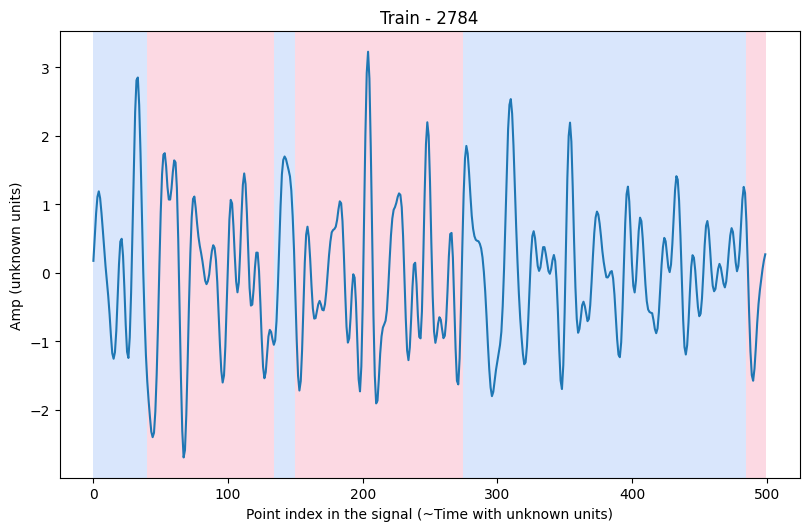

<Figure size 640x480 with 0 Axes>

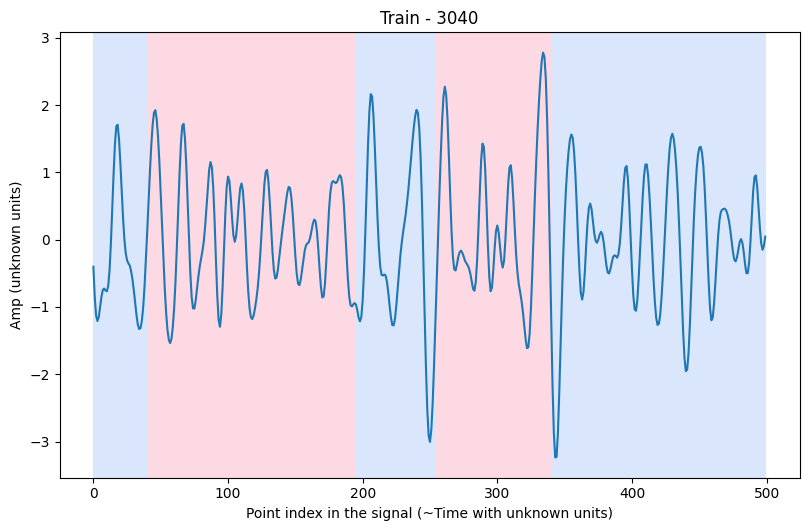

<Figure size 640x480 with 0 Axes>

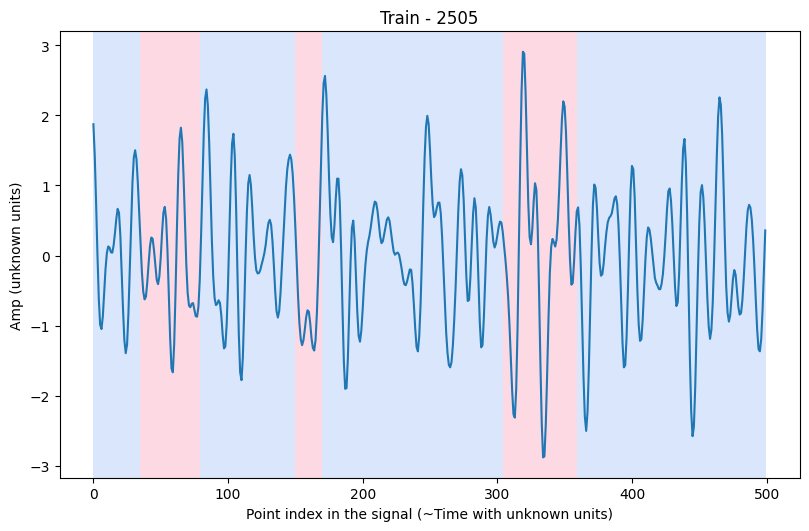

<Figure size 640x480 with 0 Axes>

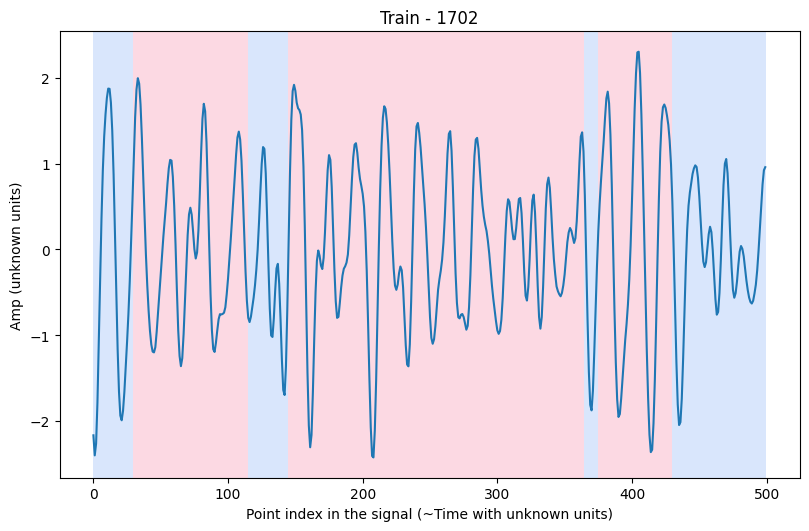

<Figure size 640x480 with 0 Axes>

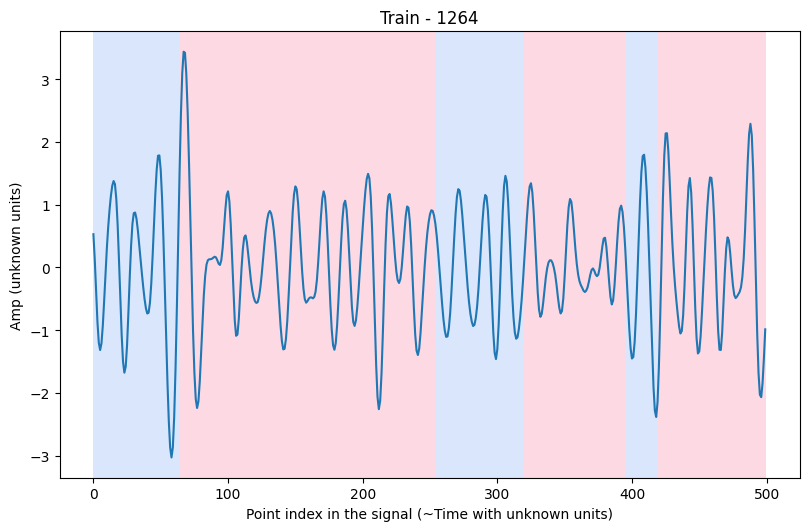

<Figure size 640x480 with 0 Axes>

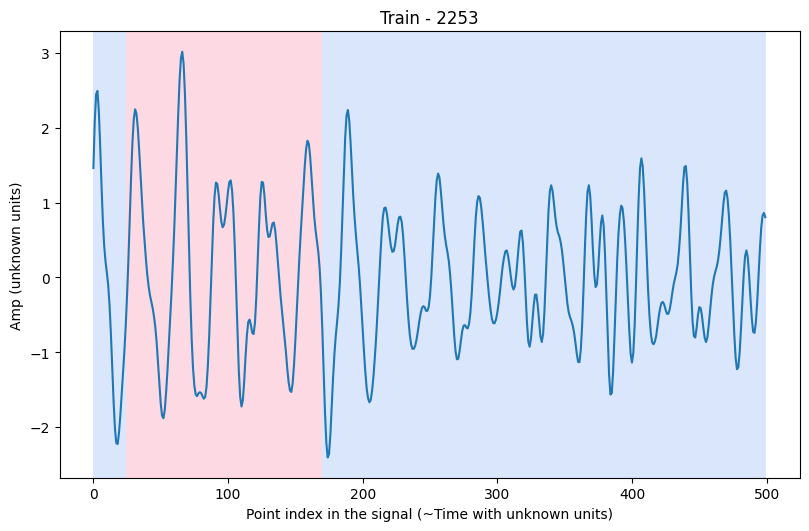

<Figure size 640x480 with 0 Axes>

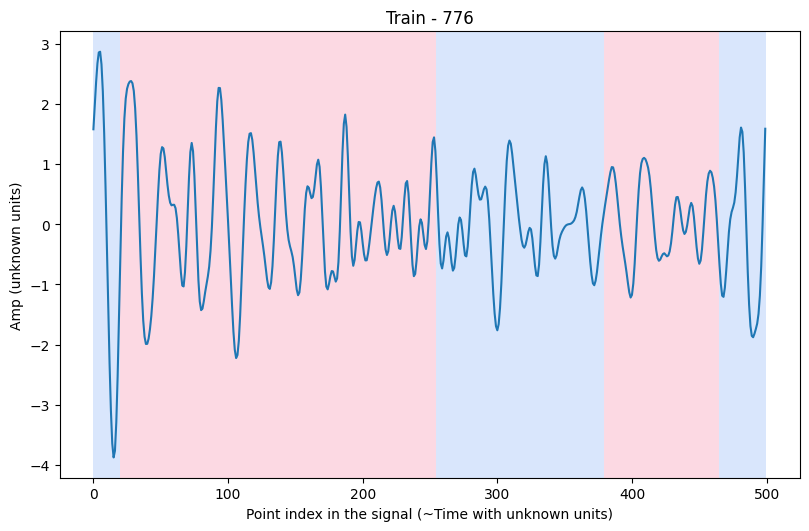

<Figure size 640x480 with 0 Axes>

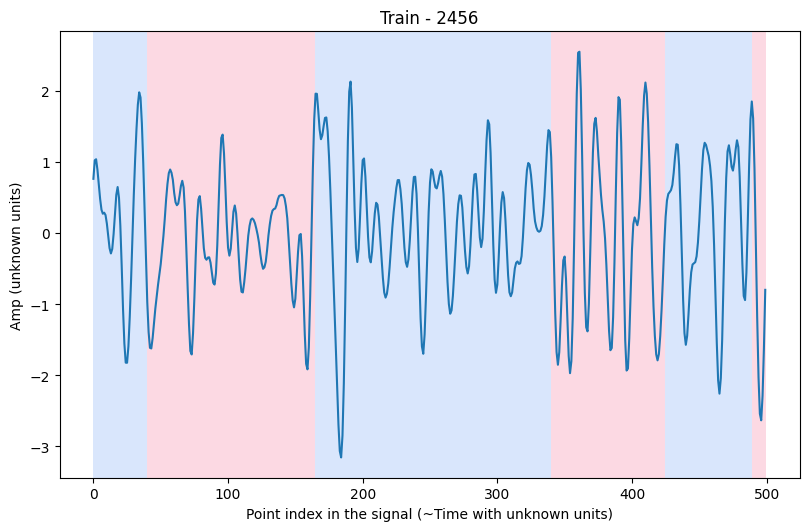

<Figure size 640x480 with 0 Axes>

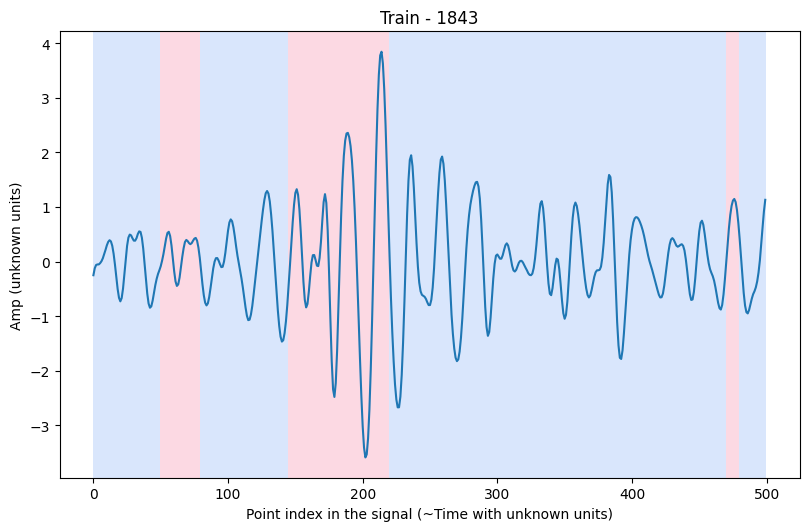

<Figure size 640x480 with 0 Axes>

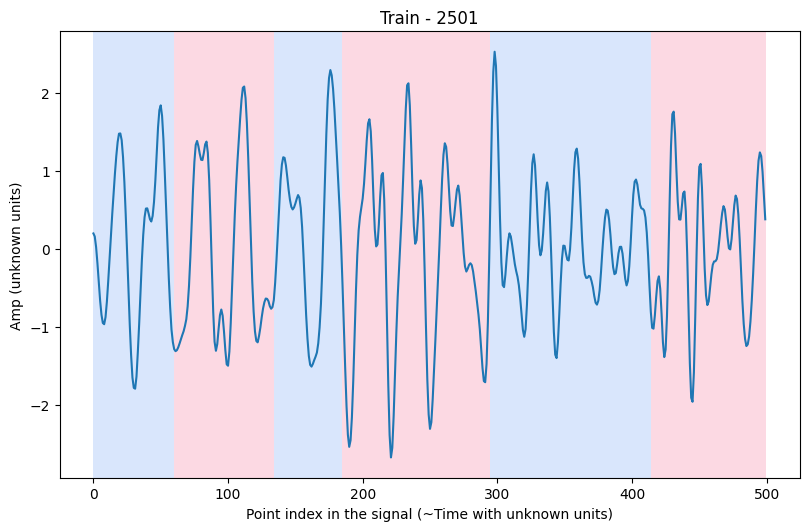

<Figure size 640x480 with 0 Axes>

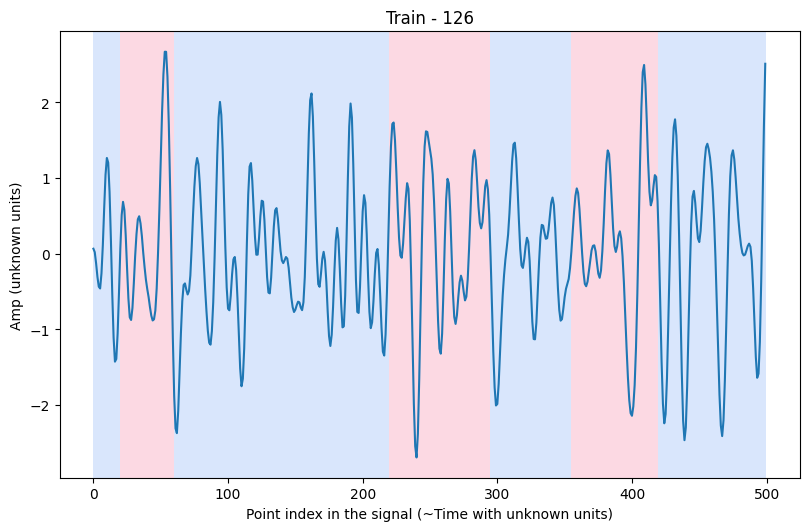

<Figure size 640x480 with 0 Axes>

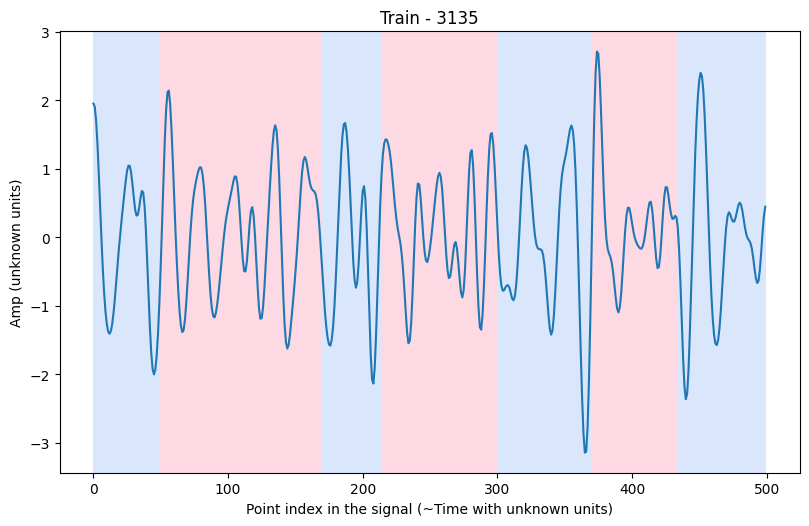

<Figure size 640x480 with 0 Axes>

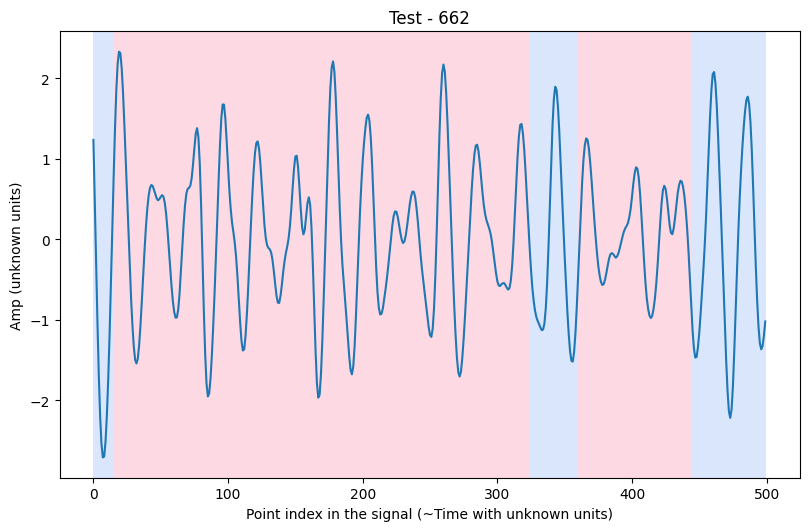

<Figure size 640x480 with 0 Axes>

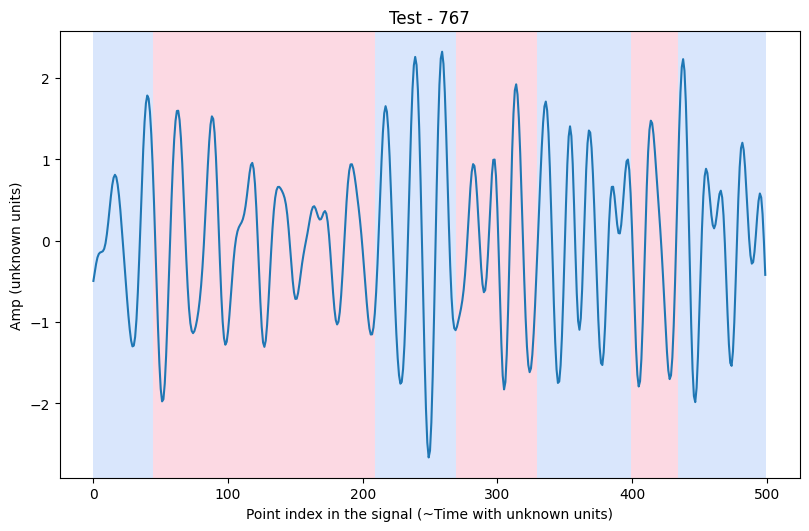

<Figure size 640x480 with 0 Axes>

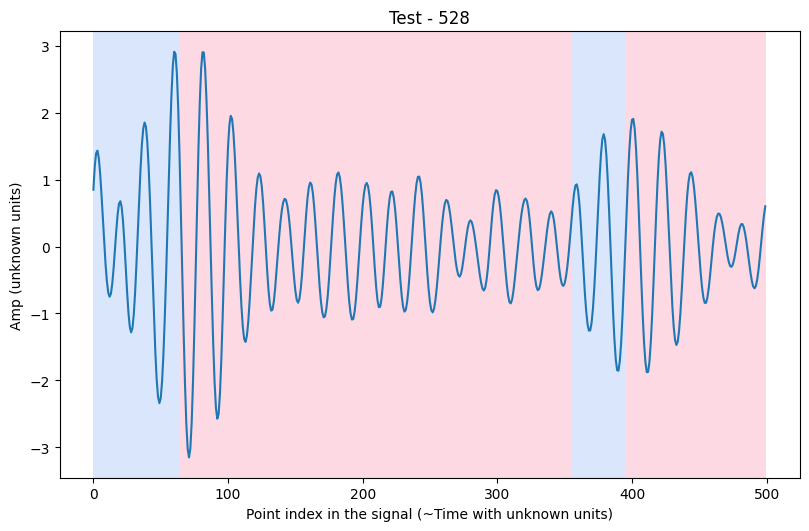

<Figure size 640x480 with 0 Axes>

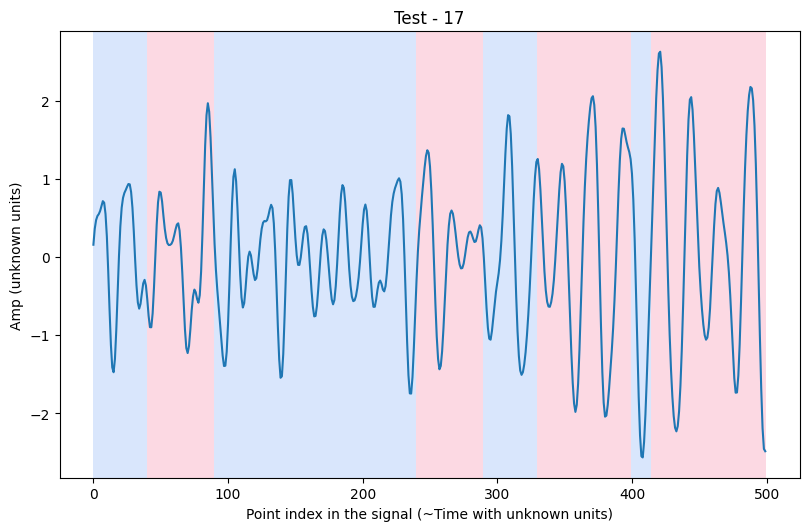

<Figure size 640x480 with 0 Axes>

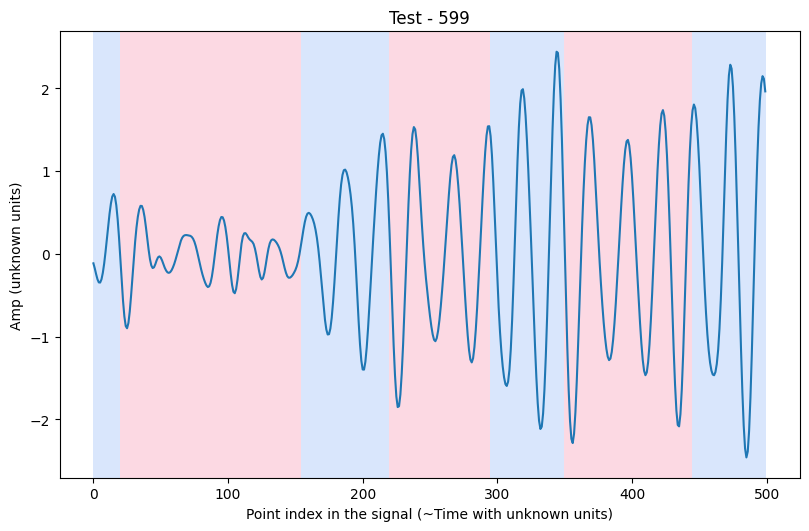

<Figure size 640x480 with 0 Axes>

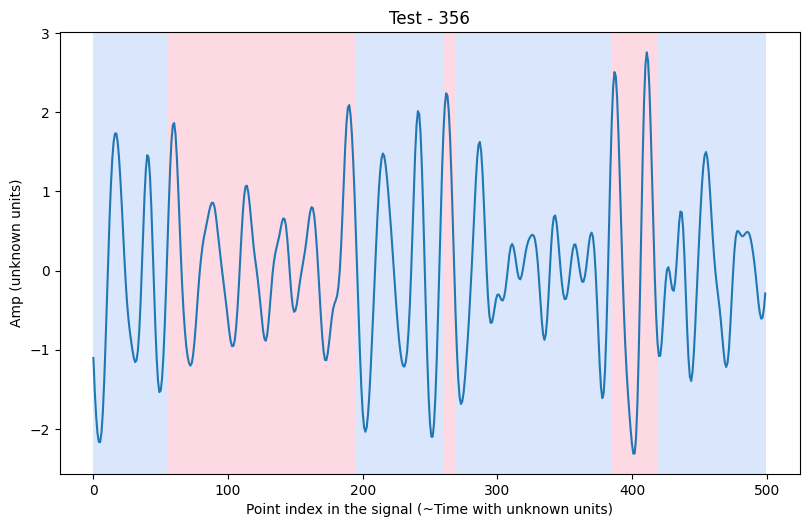

<Figure size 640x480 with 0 Axes>

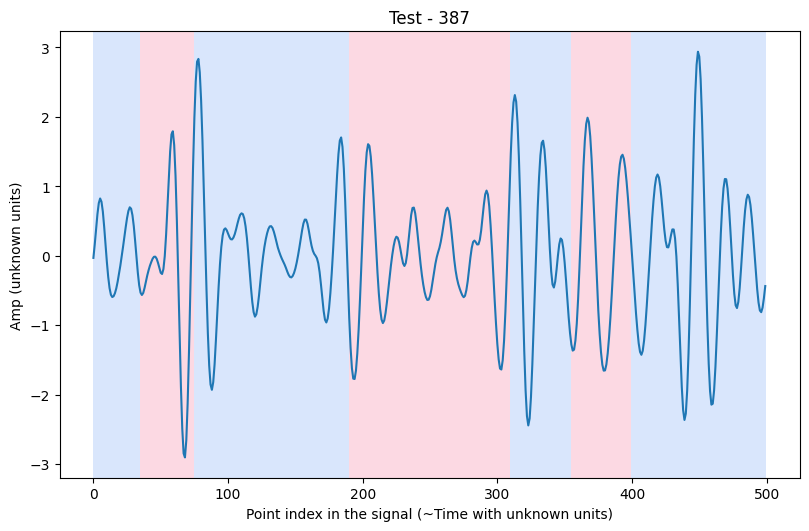

<Figure size 640x480 with 0 Axes>

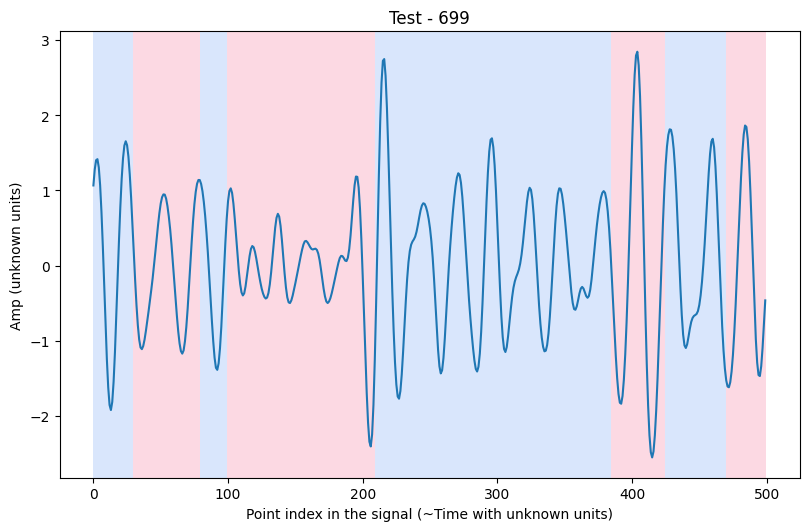

<Figure size 640x480 with 0 Axes>

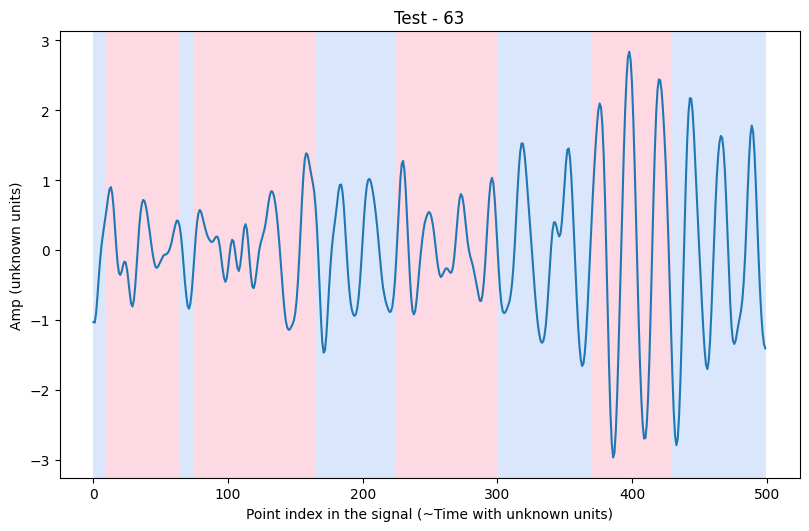

<Figure size 640x480 with 0 Axes>

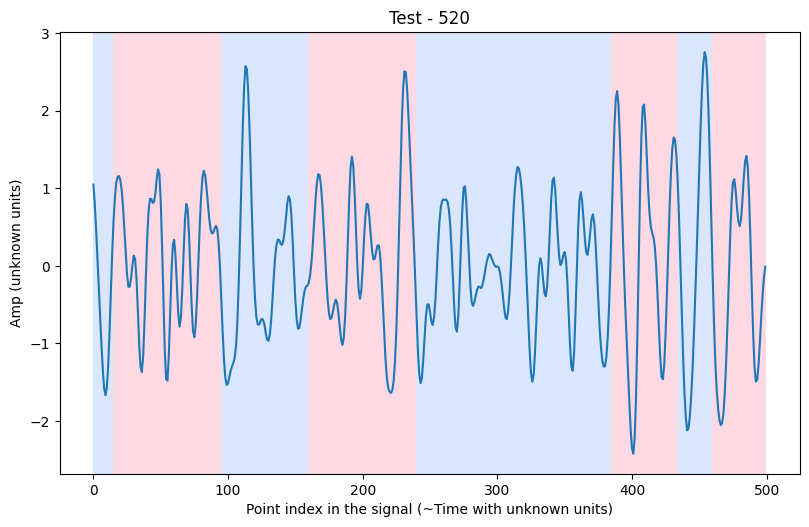

<Figure size 640x480 with 0 Axes>

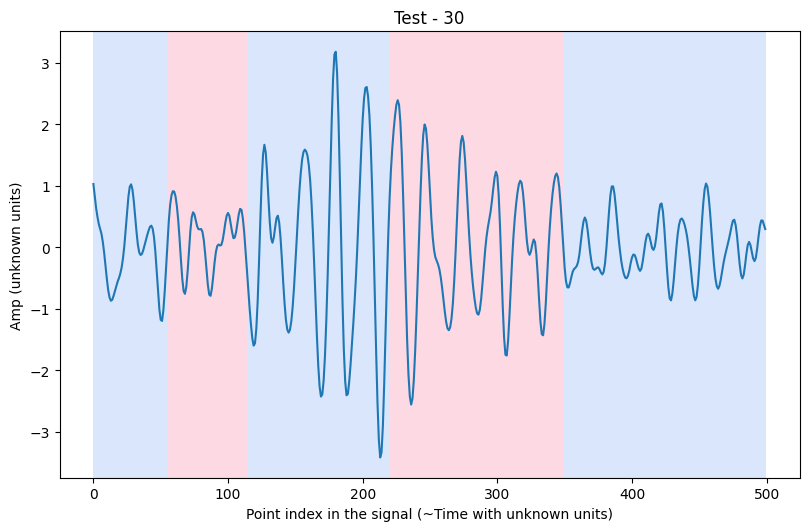

<Figure size 640x480 with 0 Axes>

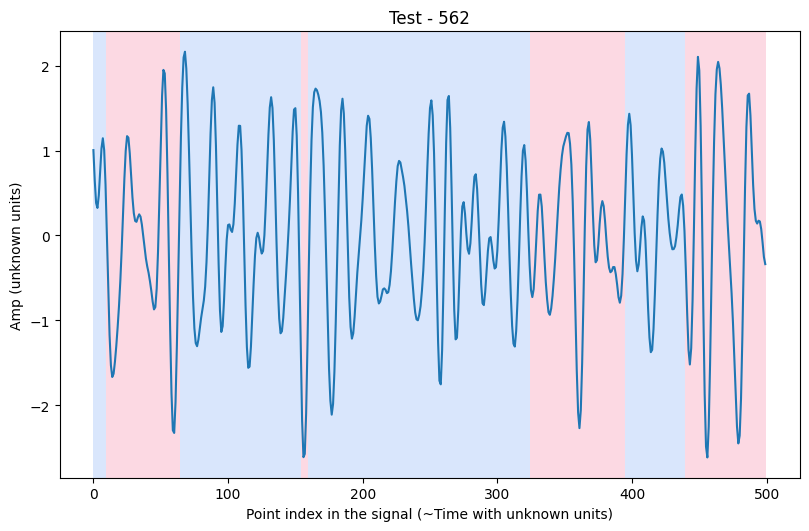

<Figure size 640x480 with 0 Axes>

In [81]:
sample_size = 12
train_sample = rd.sample(train_database.datas, sample_size)
test_sample = rd.sample(test_database.datas, sample_size)

for sample in train_sample:

    plot_segmentation(sample.values, sample.bkps)
    plt.title(f'Train - {sample.index}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()

for sample in test_sample:

    plot_segmentation(sample.values,sample.bkps)
    plt.title(f'Test - {sample.index}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()

# 3.Visual optimisation of the scaling coeficient. The upper part needs to be ran again to update the segmentation with the selected scaling coefficient.

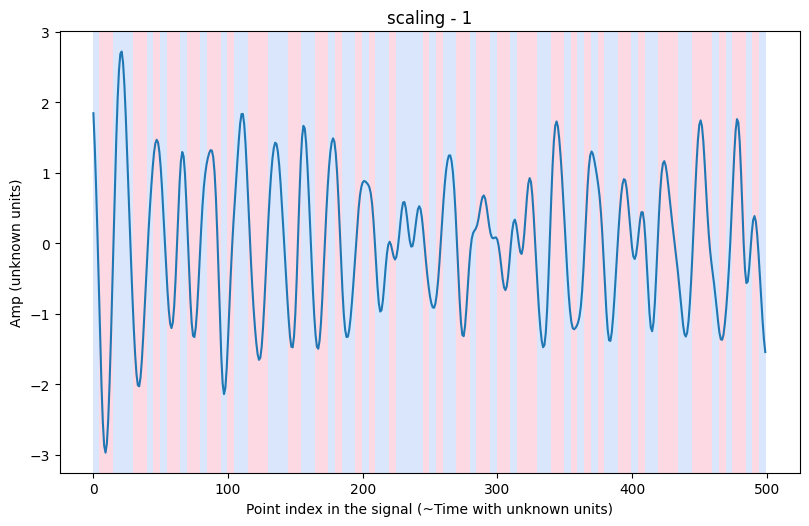

<Figure size 640x480 with 0 Axes>

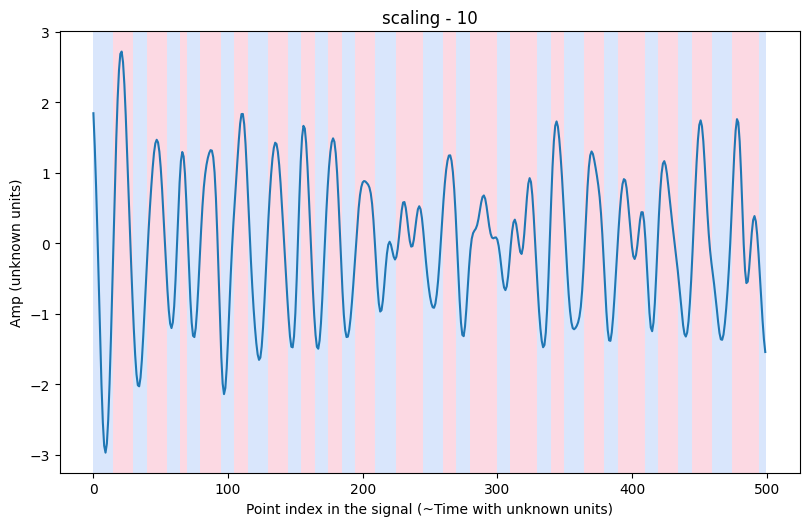

<Figure size 640x480 with 0 Axes>

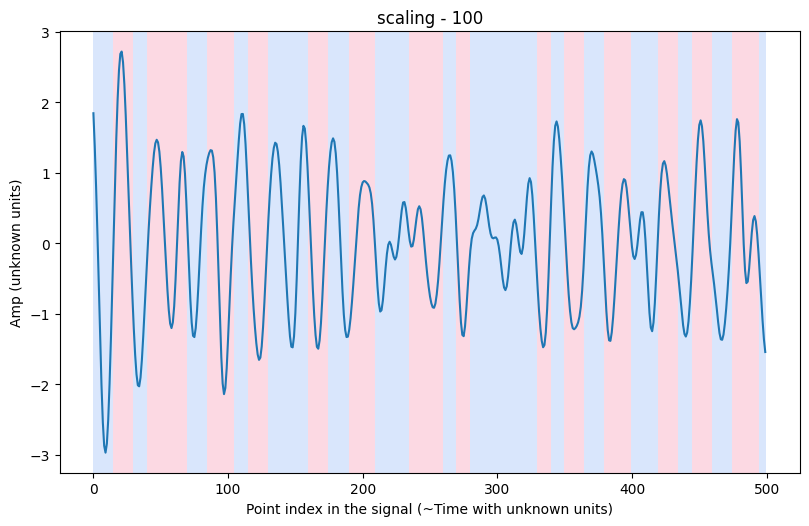

<Figure size 640x480 with 0 Axes>

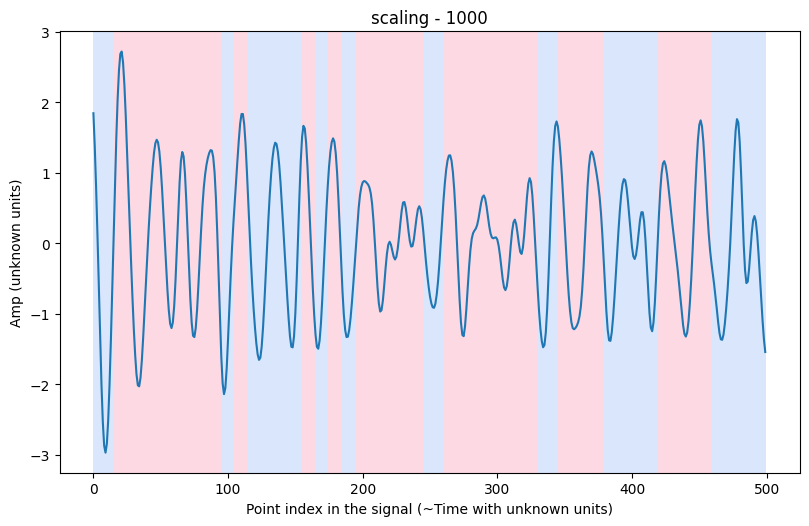

<Figure size 640x480 with 0 Axes>

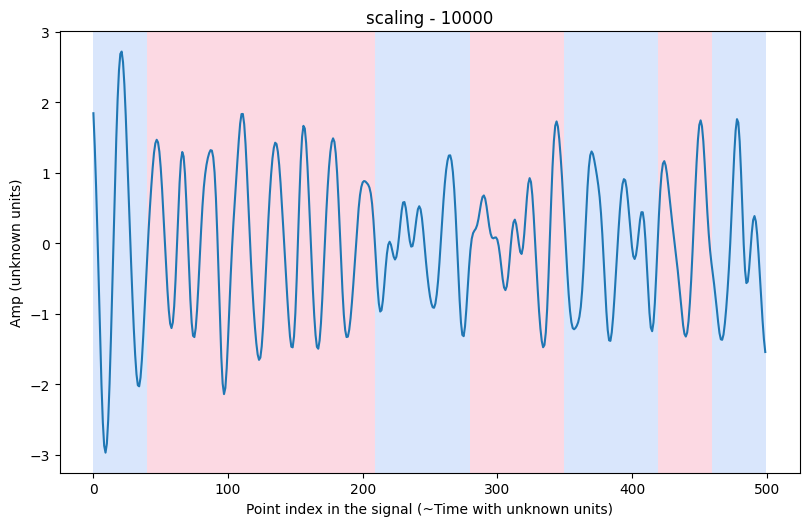

<Figure size 640x480 with 0 Axes>

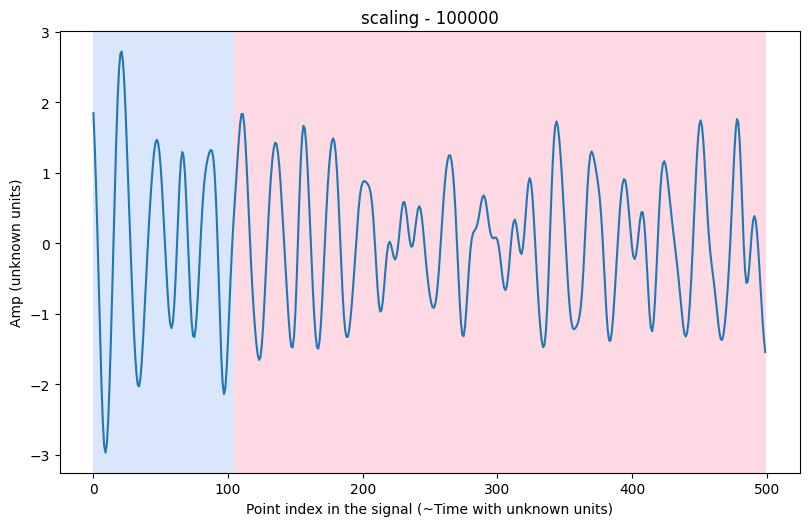

<Figure size 640x480 with 0 Axes>

In [82]:
data = train_database.datas[1856]

#scaling_coef_list = [10**(i/3) for i in range(18)]
scaling_coef_list = [10**i for i in range(6)]
for scaling_coef in scaling_coef_list:
    bkps = segmentation(data.values, scaling_coef, min_size)
    plot_segmentation(data.values, bkps)
    plt.title(f'scaling - {scaling_coef}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()


In [83]:
data = train_database.datas[1856]

print(data.bkps)

[40, 210, 280, 350, 420, 460, 500]


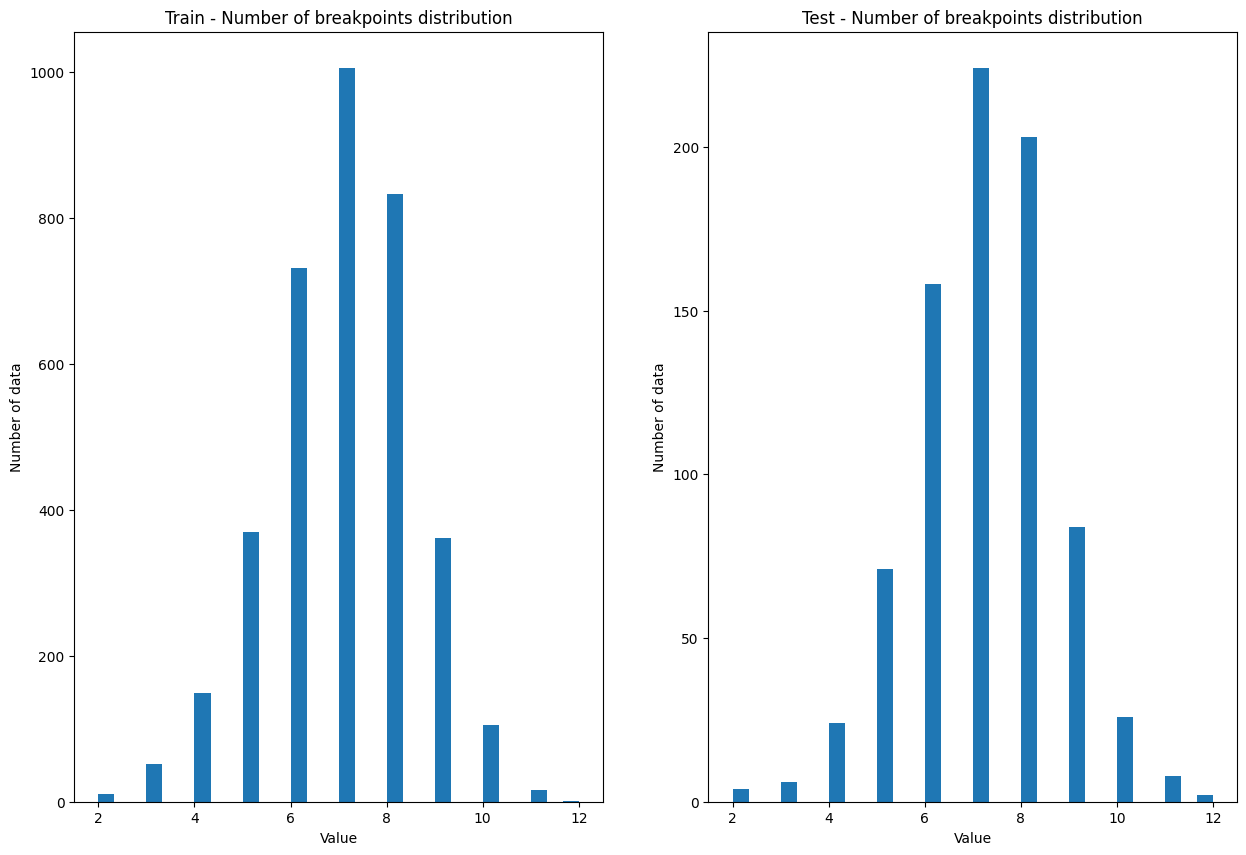

In [84]:
train_breaks_number = [len(data.bkps) for data in train_database.datas]
test_breaks_number = [len(data.bkps) for data in test_database.datas]

cols = math.ceil(math.sqrt(2))  # Try to make the figure roughly square
rows = math.ceil(2 / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

axes[0].hist(train_breaks_number, bins = 30)
axes[0].set_title(f'Train - Number of breakpoints distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Number of data')

axes[1].hist(test_breaks_number, bins = 30)
axes[1].set_title(f'Test - Number of breakpoints distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Number of data')


plt.show()


# 4. Checking if the segments have some interpretable features

In [85]:
data = train_database.datas[1856]

sub_signals = []

for i in range(len(data.bkps)-1):
    sub_signals.append(data.values[data.bkps[i]:data.bkps[i+1]])



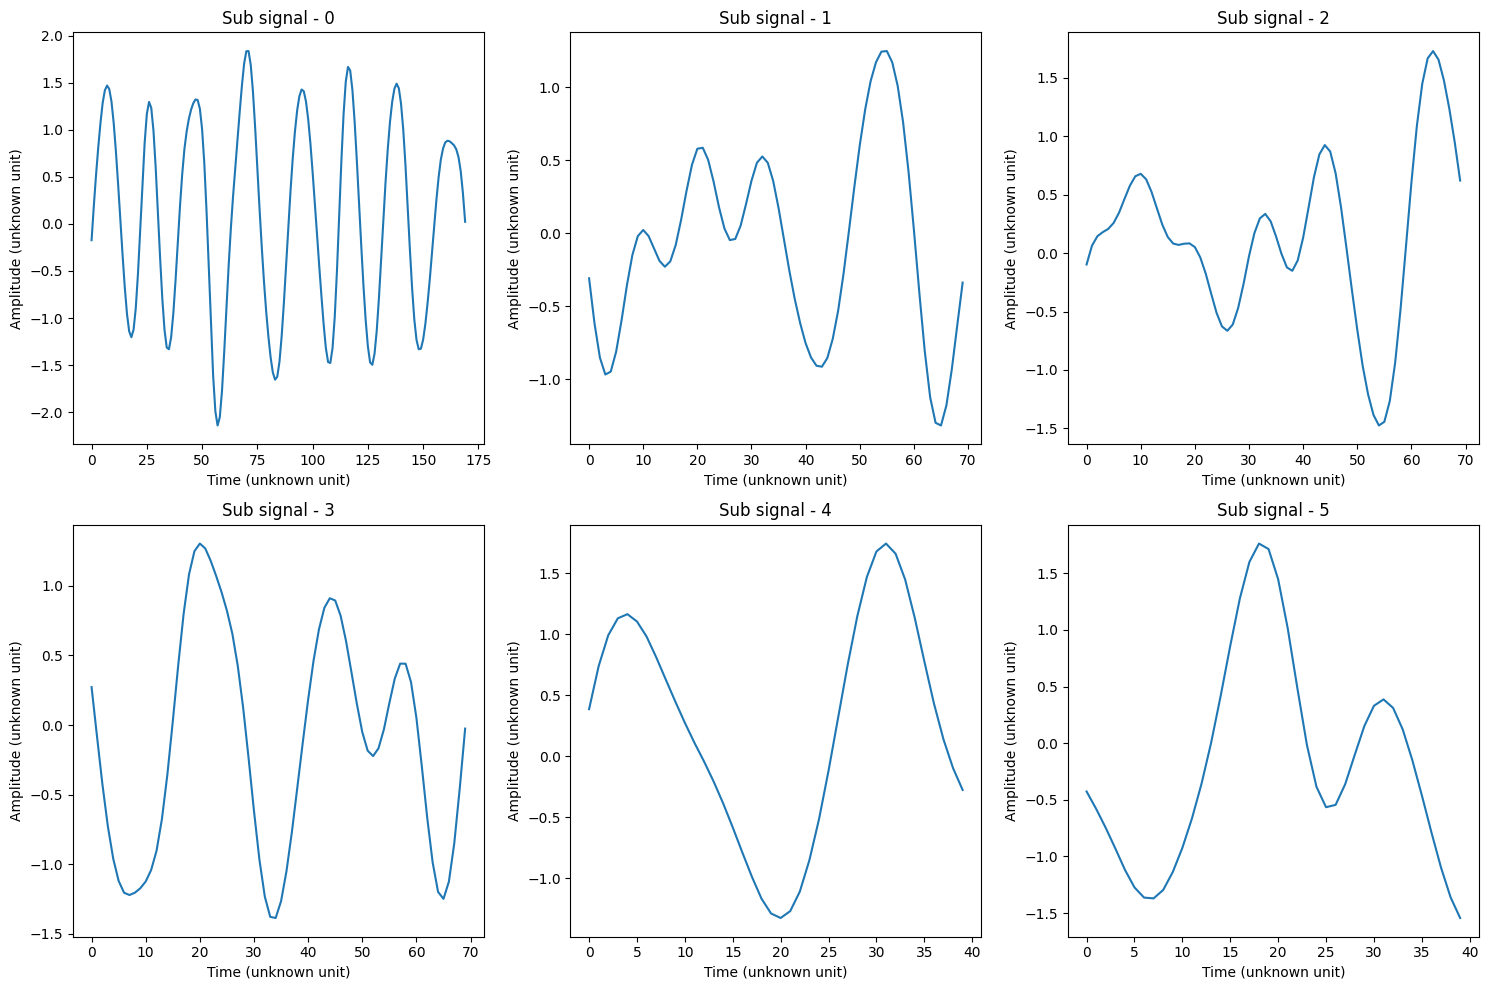

In [86]:
cols = math.ceil(math.sqrt(len(sub_signals)))  # Try to make the figure roughly square
rows = math.ceil(len(sub_signals) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

# Now plot something on each subplot
for  i, signal in enumerate(sub_signals):
    

    axes[i].plot(range(len(signal)), signal)  
    
    title = f'Sub signal - {i}'
    

    axes[i].set_title(title)
    axes[i].set_xlabel("Time (unknown unit)")
    axes[i].set_ylabel("Amplitude (unknown unit)")


# Hide unused subplots if any
for i in range(len(sub_signals), rows * cols):
    fig.delaxes(axes[i])  # Deletes the extra subplots

plt.tight_layout()
plt.show()

In [87]:
def my_fft(x,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    X=np.fft.fftshift(X)
    # Computation the frequency vector
    f=np.fft.fftfreq(N, d=1/Fs)
    f=np.fft.fftshift(f)
    #return X[len(X)//2:],f[len(X)//2:]
    return X, f

<Figure size 640x480 with 0 Axes>

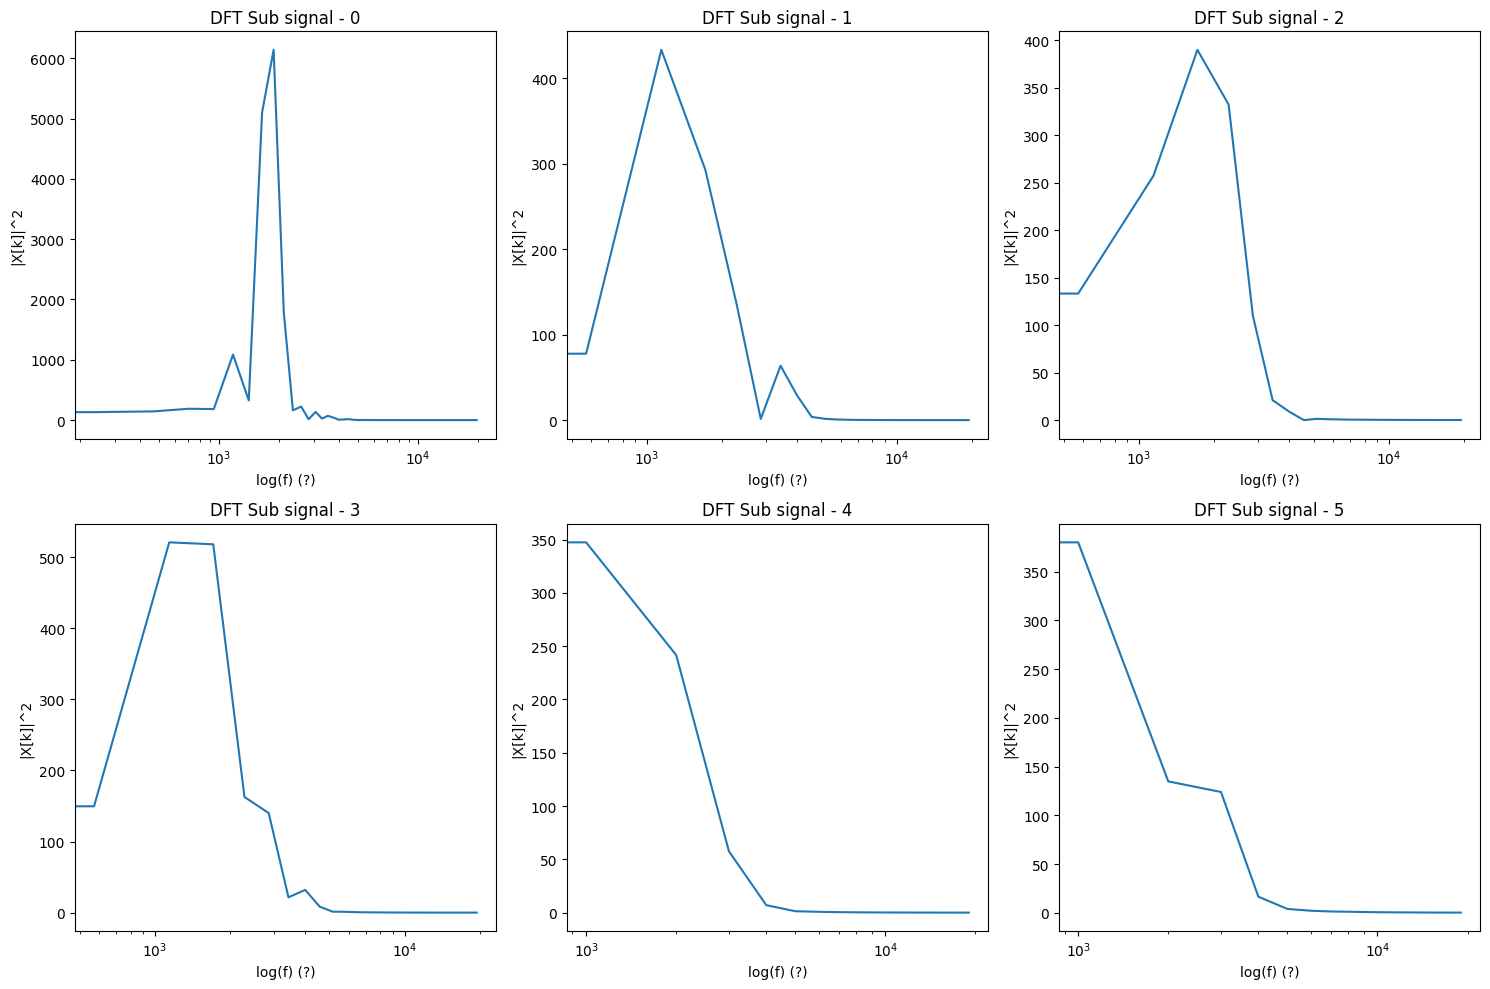

In [88]:
Fs = 40000
plot_symetric_spectrum = False

plt.clf()

# Calculate number of rows and columns (can be square or based on your preference)
cols = math.ceil(math.sqrt(len(sub_signals)))  # Try to make the figure roughly square
rows = math.ceil(len(sub_signals) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

# Now plot something on each subplot
for  i, signal in enumerate(sub_signals):

    # Display of the squared absolute value of the DFT as a function of frequency
    fft_data_values,f=my_fft(signal,Fs)
    
    if not plot_symetric_spectrum:
        fft_data_values = fft_data_values[len(fft_data_values)//2 :]
        f = f[len(f)//2 :]

    axes[i].plot(f, np.abs(fft_data_values)**2)  # Replace with your actual plot logic
    axes[i].set_title(f'DFT Sub signal - {i}')
    
    axes[i].set_xlabel('log(f) (?)')
    axes[i].set_xscale('log')
    axes[i].set_ylabel('|X[k]|^2')



# Hide unused subplots if any
for i in range(len(sub_signals), rows * cols):
    fig.delaxes(axes[i])  # Deletes the extra subplots

plt.tight_layout()
plt.show()

# 5. Shannon entropy segmentation

In [89]:
def my_fft(x,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    X=np.fft.fftshift(X)
    # Computation the frequency vector
    f=np.fft.fftfreq(N, d=1/Fs)
    f=np.fft.fftshift(f)
    #return X[len(X)//2:],f[len(X)//2:]
    return X, f

In [90]:
class Shannon_entropy(BaseCost):
    # The 2 following attributes must be specified for compatibility.
    model = ""
    min_size = 2
    Fs = 1

    def fit(self, signal):
        self.signal = signal
        return self

    def error(self, start, end):
        signal_portion = self.signal[start:end]

        signal_portion_DFT,f = my_fft(signal_portion, Fs)

        normalised_signal_portion_DFT = (np.abs(signal_portion_DFT)**2)/np.sum(np.abs(signal_portion_DFT)**2)

        H = -np.sum(normalised_signal_portion_DFT*np.log(normalised_signal_portion_DFT))

        #print(H)
        
        return H

In [91]:
min_size = 2
scaling_factor = 1e4
def segmentation_2(signal, scaling_factor, min_size):
    pen = scaling_factor*np.std(signal)*np.log(len(signal))
    loss = Shannon_entropy()
    algo = rpt.Pelt(model = "l2", custom_cost = loss, min_size = min_size).fit(signal)
    bkps = algo.predict(pen = pen)

    return bkps

In [92]:
class Data_2():
    def __init__(self, index, values, scaling_factor, min_size,  database_name = ''):
        self.index = index
        self.database_name = database_name

        #Forbidden info in the context of the project
        #self.class_index = values[0]

        self.values = np.array(values[1:])

        self.bkps = segmentation_2(self.values, scaling_factor, min_size)

In [93]:
class Database_2():
    def __init__(self, name, datas):
        self.name = name
        self.datas = datas

        for data in self.datas:
            data.database_name = self.name

In [94]:
def load_database_2(database_path, scaling_factor, min_size):
    datas = []

    with open(database_path, 'r') as file:
        data_index = 0
        for raw_data in file:
            raw_data_line = raw_data.strip('\n').split(' ')
            data_values = []
            for raw_value in raw_data_line:
                if len(raw_value)!=0:
                    data_values.append(float(raw_value))

            datas.append(Data_2(data_index, data_values, scaling_factor, min_size))
            data_index += 1
        
    name = database_path.strip('.txt').split('/')[-1]
    return Database_2(name, datas)

In [95]:
train_database_path = '/teamspace/studios/this_studio/Données/FordB_TRAIN.txt'
test_database_path = '/teamspace/studios/this_studio/Données/FordB_TEST.txt'

In [96]:
scaling_factor = 0.03
min_size = 2
train_database = load_database_2(train_database_path, scaling_factor, min_size)
test_database = load_database_2(test_database_path, scaling_factor, min_size)

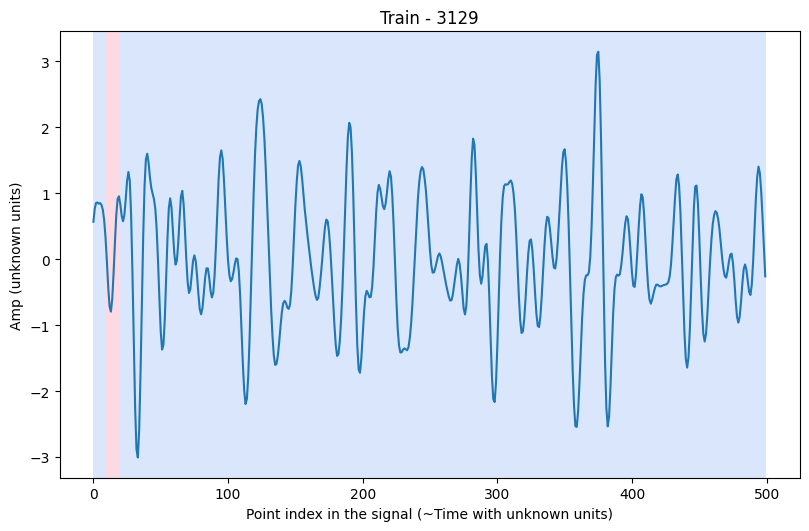

<Figure size 640x480 with 0 Axes>

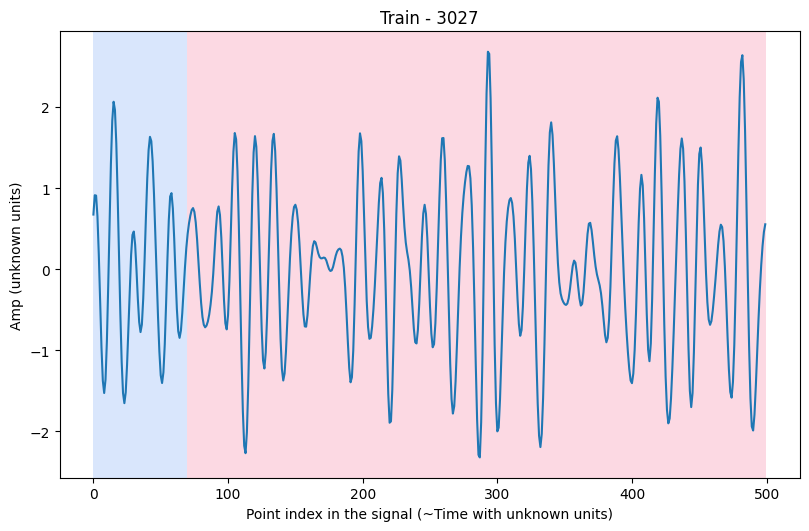

<Figure size 640x480 with 0 Axes>

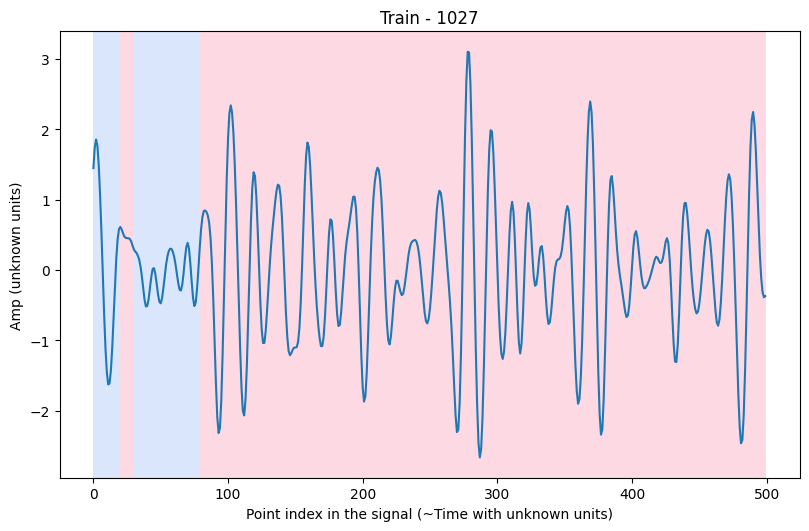

<Figure size 640x480 with 0 Axes>

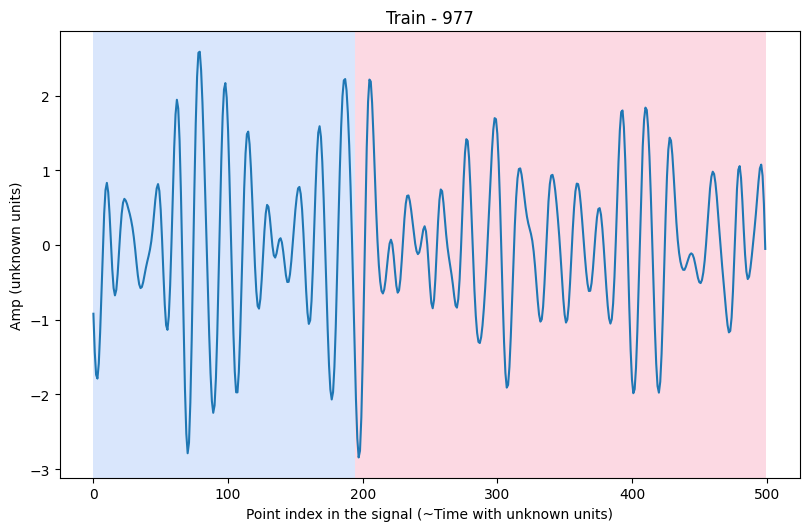

<Figure size 640x480 with 0 Axes>

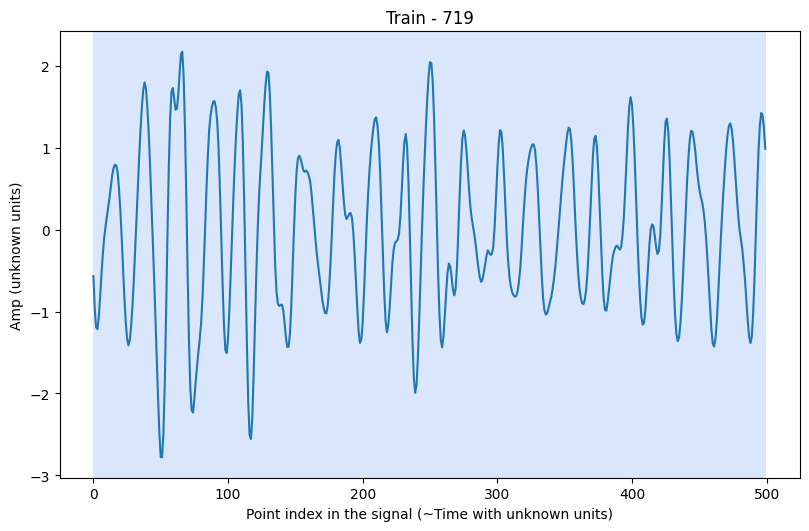

<Figure size 640x480 with 0 Axes>

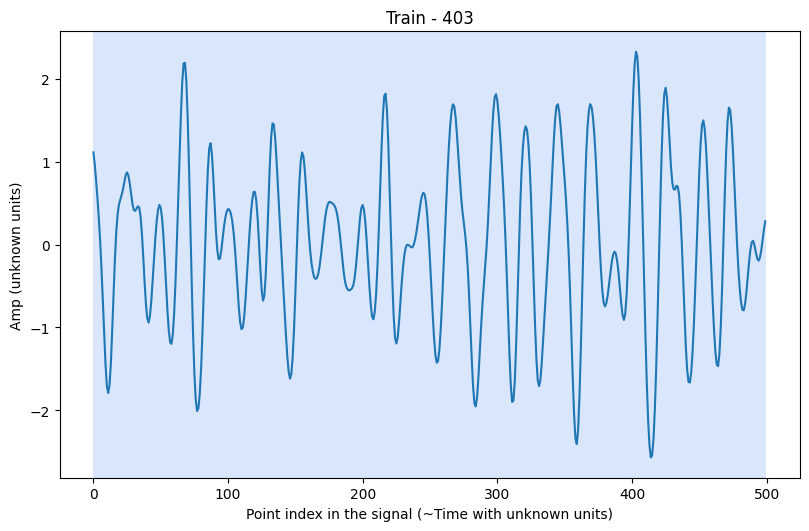

<Figure size 640x480 with 0 Axes>

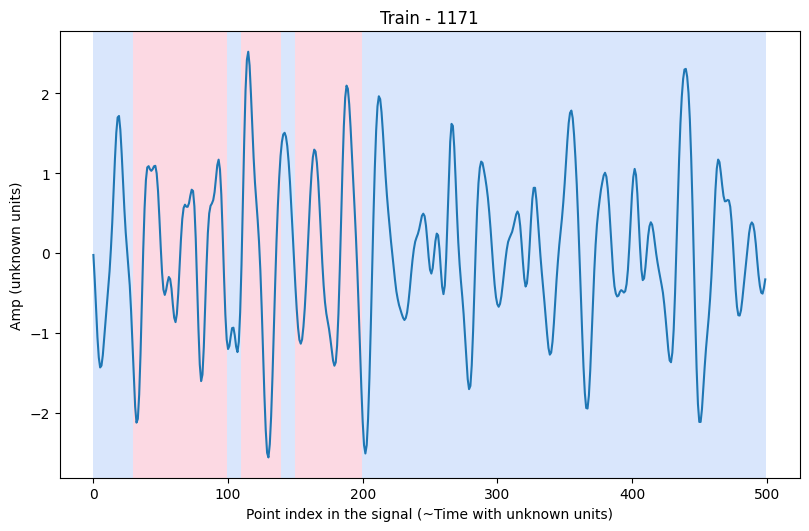

<Figure size 640x480 with 0 Axes>

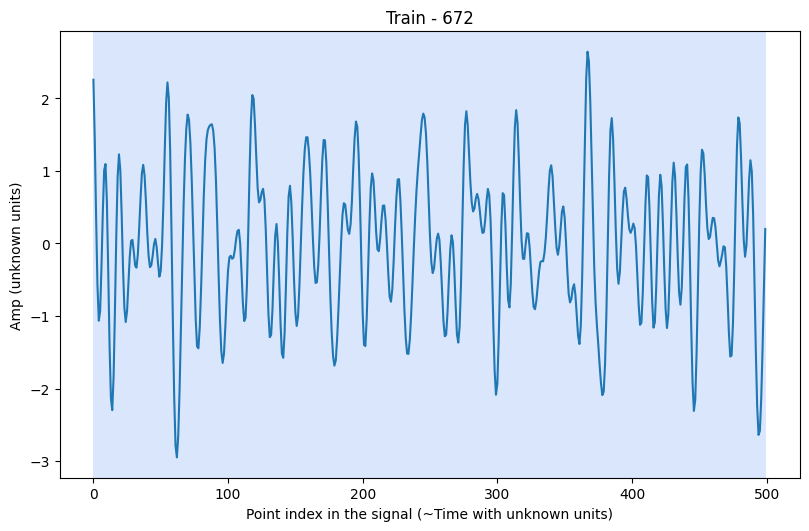

<Figure size 640x480 with 0 Axes>

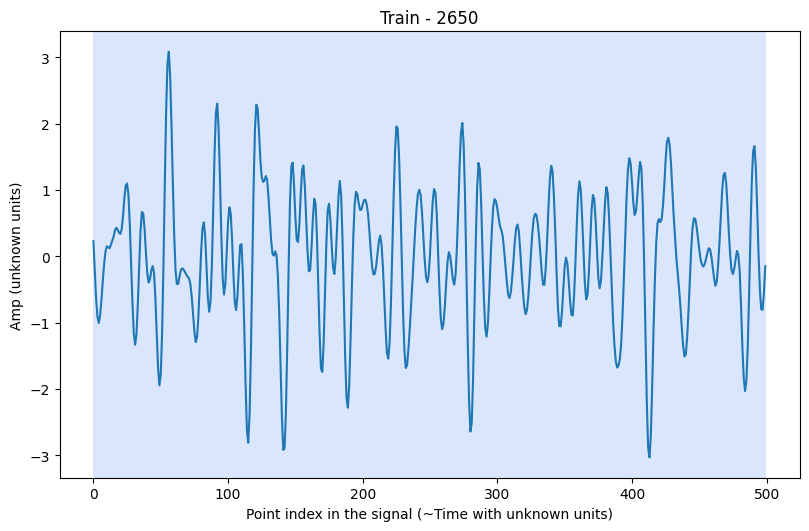

<Figure size 640x480 with 0 Axes>

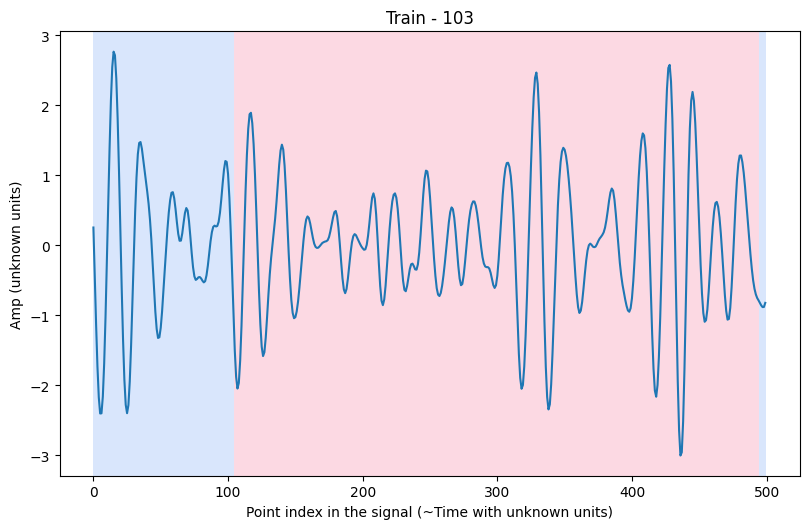

<Figure size 640x480 with 0 Axes>

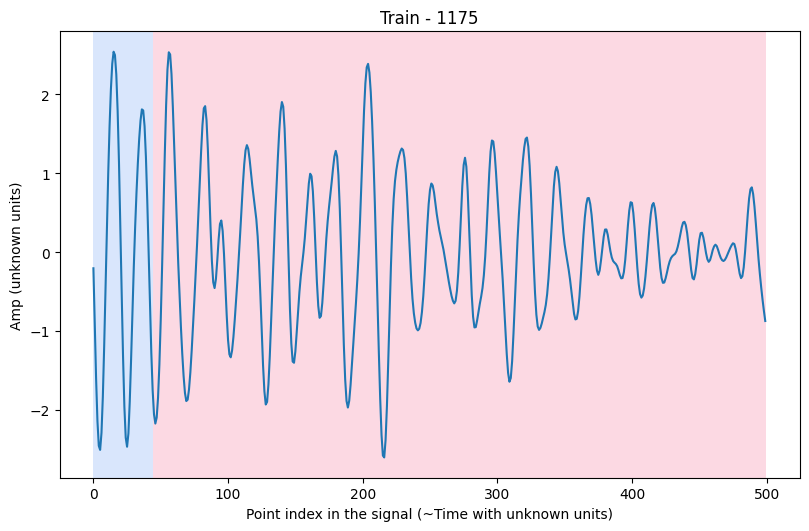

<Figure size 640x480 with 0 Axes>

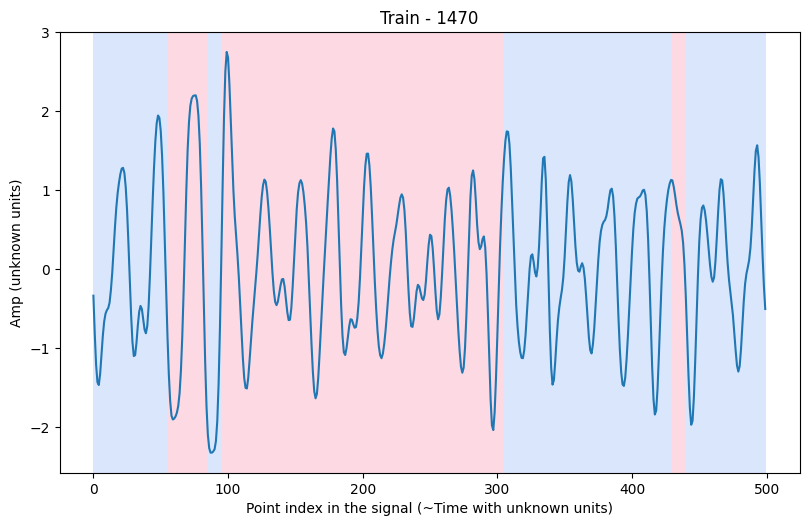

<Figure size 640x480 with 0 Axes>

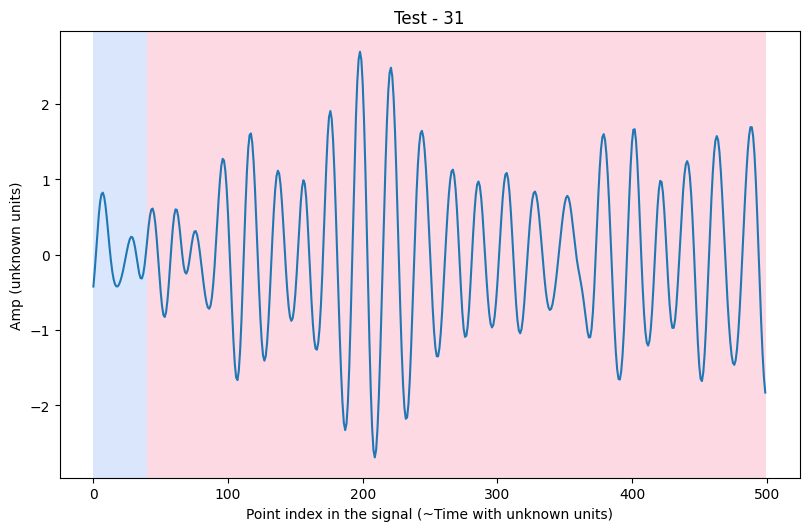

<Figure size 640x480 with 0 Axes>

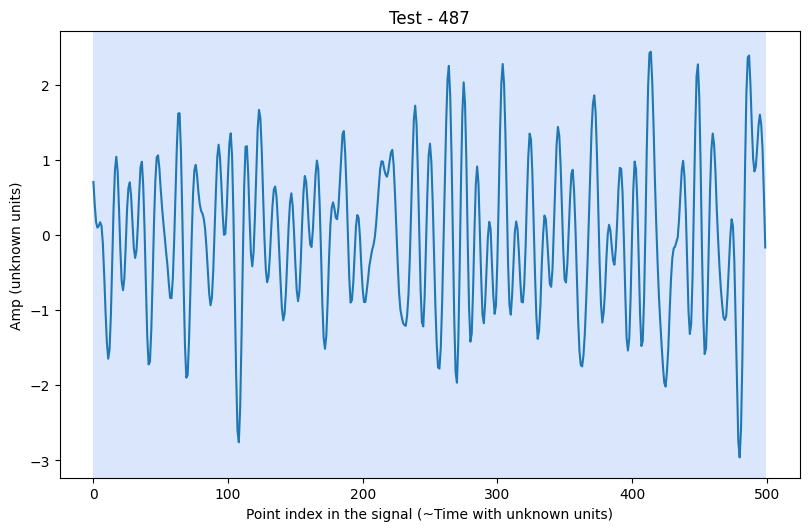

<Figure size 640x480 with 0 Axes>

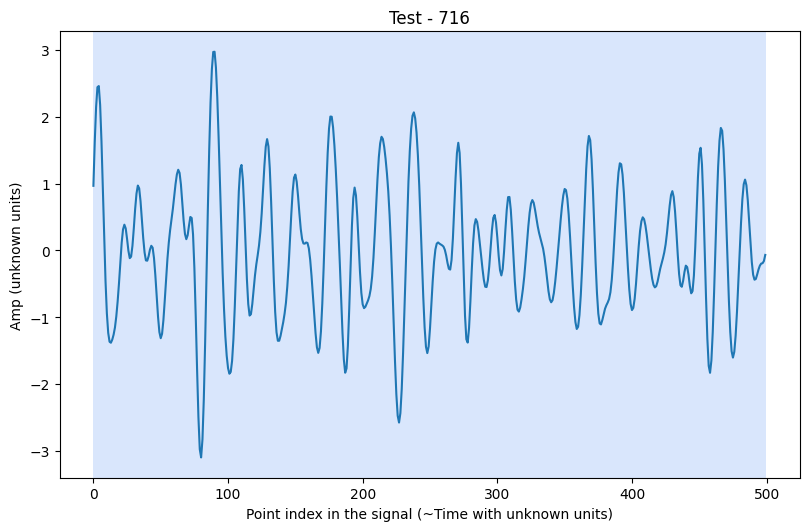

<Figure size 640x480 with 0 Axes>

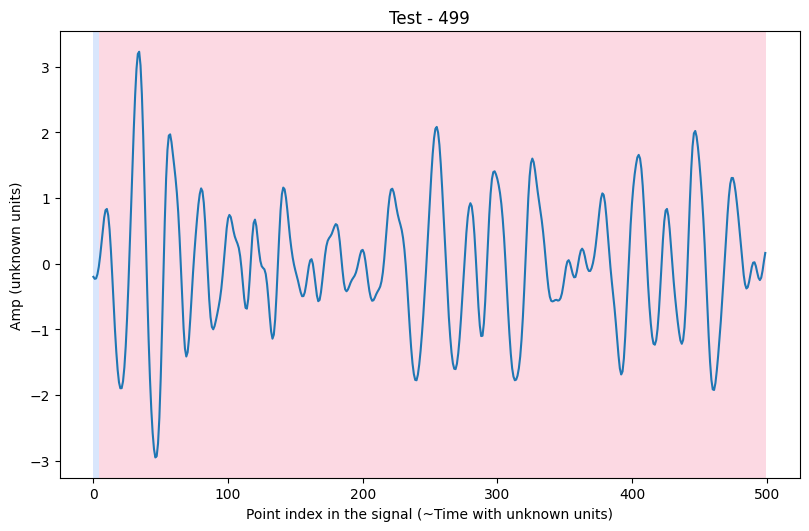

<Figure size 640x480 with 0 Axes>

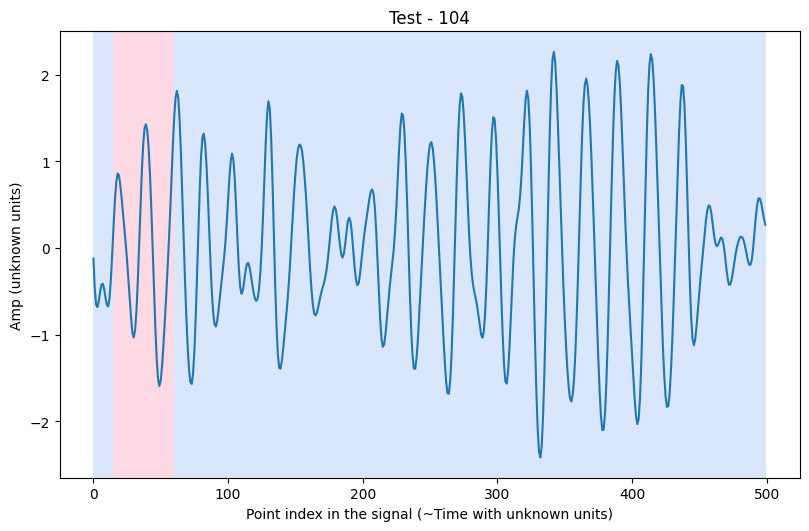

<Figure size 640x480 with 0 Axes>

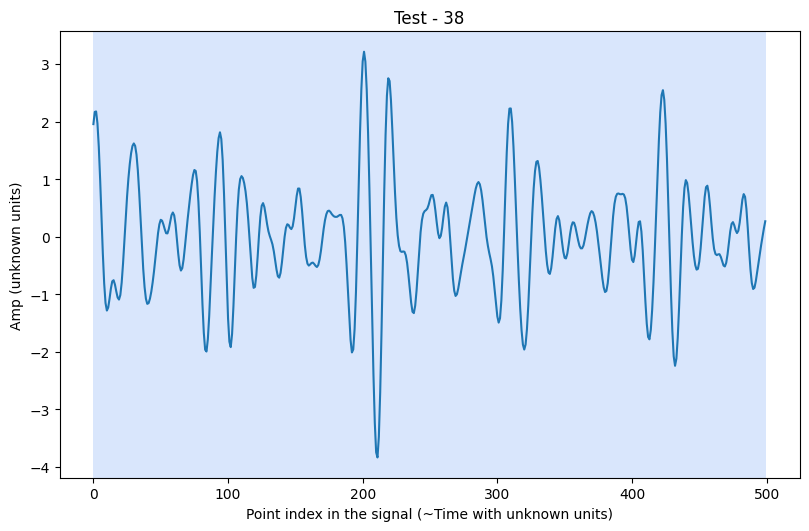

<Figure size 640x480 with 0 Axes>

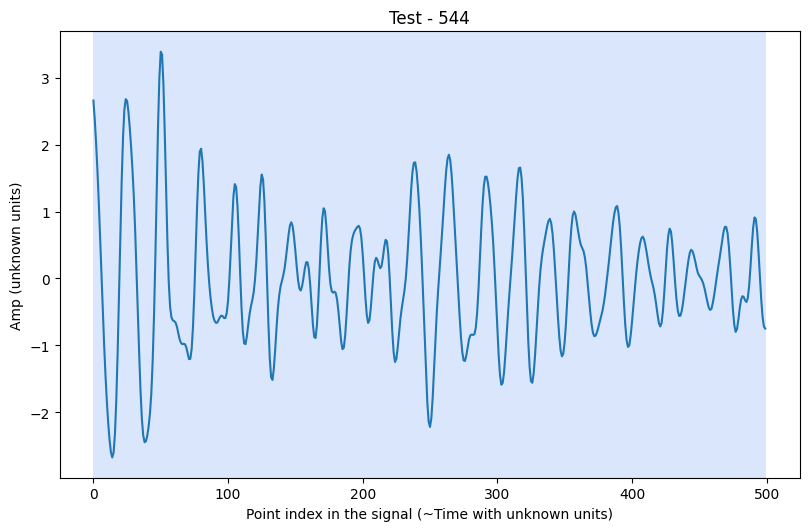

<Figure size 640x480 with 0 Axes>

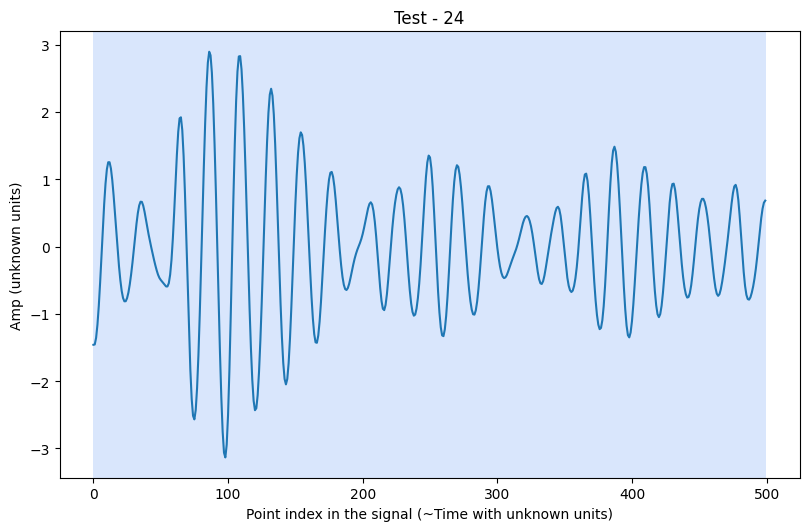

<Figure size 640x480 with 0 Axes>

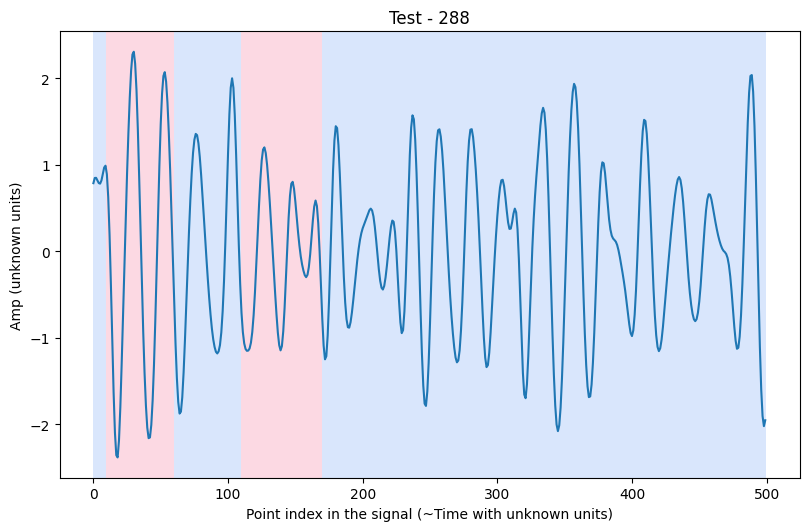

<Figure size 640x480 with 0 Axes>

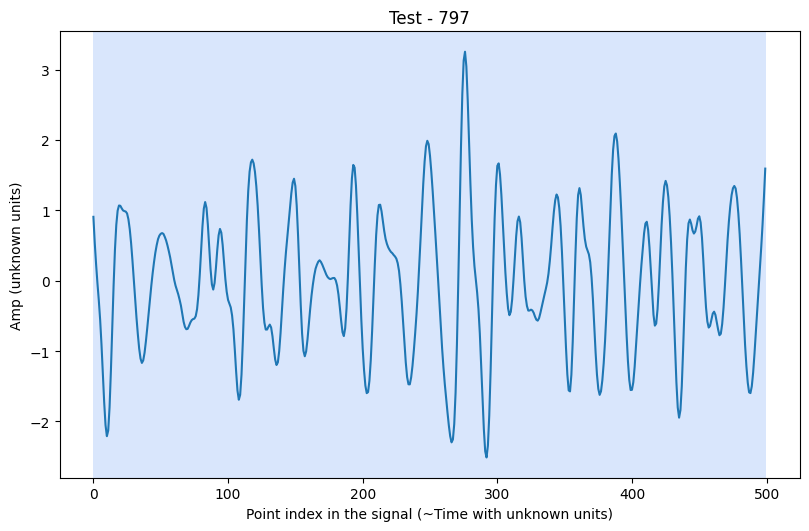

<Figure size 640x480 with 0 Axes>

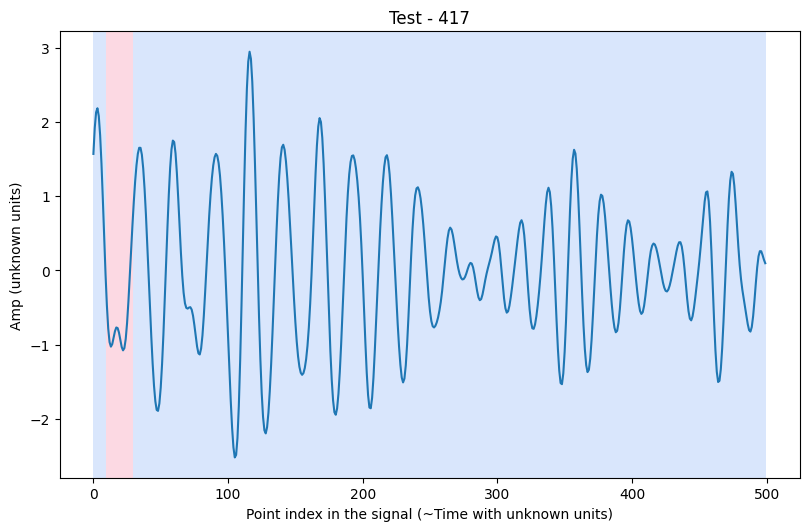

<Figure size 640x480 with 0 Axes>

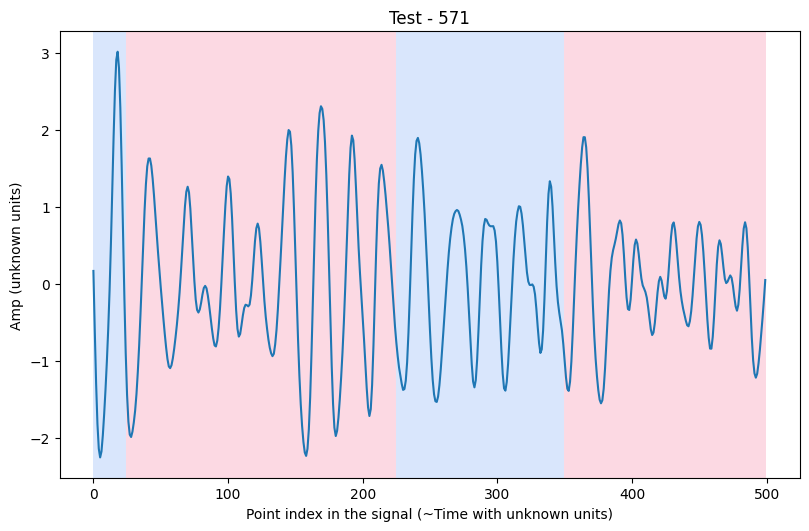

<Figure size 640x480 with 0 Axes>

In [97]:
sample_size = 12
train_sample = rd.sample(train_database.datas, sample_size)
test_sample = rd.sample(test_database.datas, sample_size)

for sample in train_sample:

    plot_segmentation(sample.values, sample.bkps)
    plt.title(f'Train - {sample.index}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()

for sample in test_sample:

    plot_segmentation(sample.values,sample.bkps)
    plt.title(f'Test - {sample.index}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()

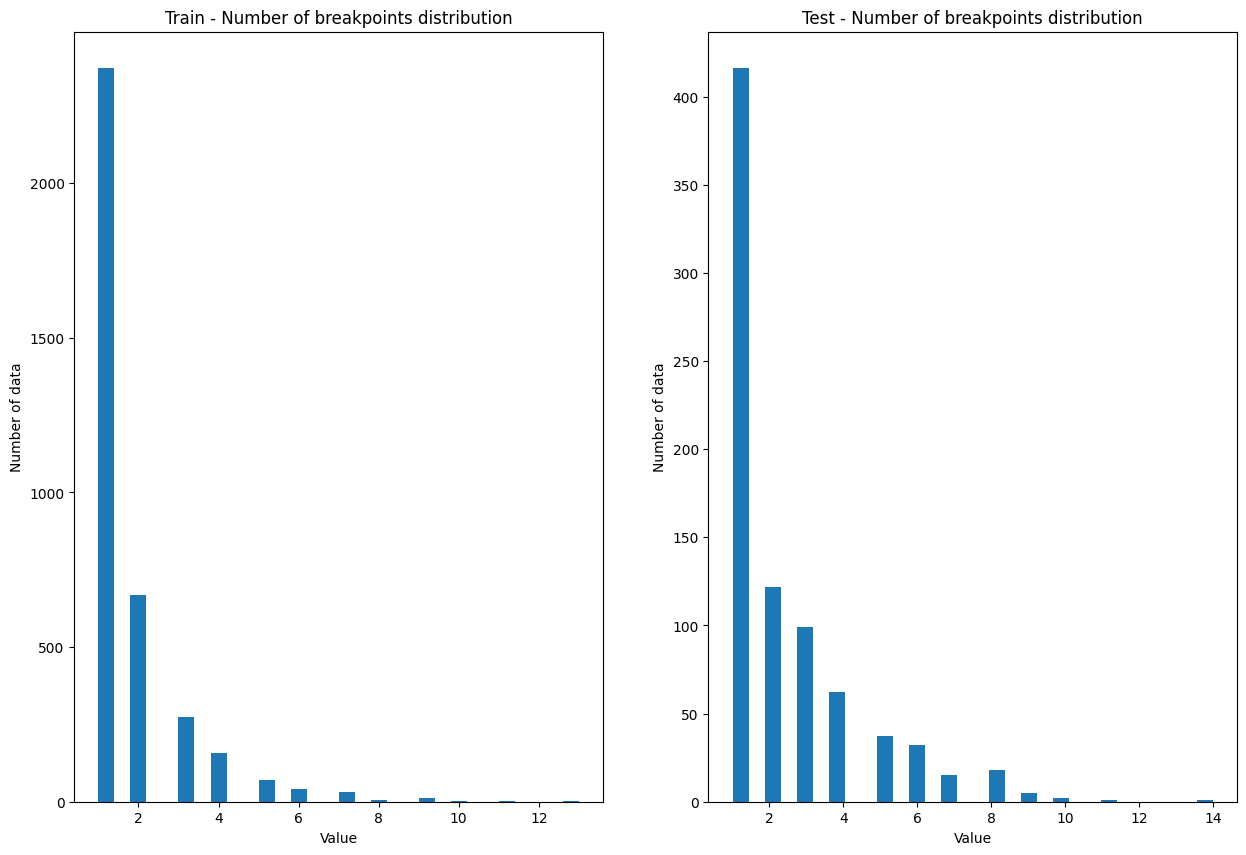

In [98]:
train_breaks_number = [len(data.bkps) for data in train_database.datas]
test_breaks_number = [len(data.bkps) for data in test_database.datas]

cols = math.ceil(math.sqrt(2))  # Try to make the figure roughly square
rows = math.ceil(2 / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

axes[0].hist(train_breaks_number, bins = 30)
axes[0].set_title(f'Train - Number of breakpoints distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Number of data')

axes[1].hist(test_breaks_number, bins = 30)
axes[1].set_title(f'Test - Number of breakpoints distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Number of data')


plt.show()

Text(0, 0.5, 'Number of data')

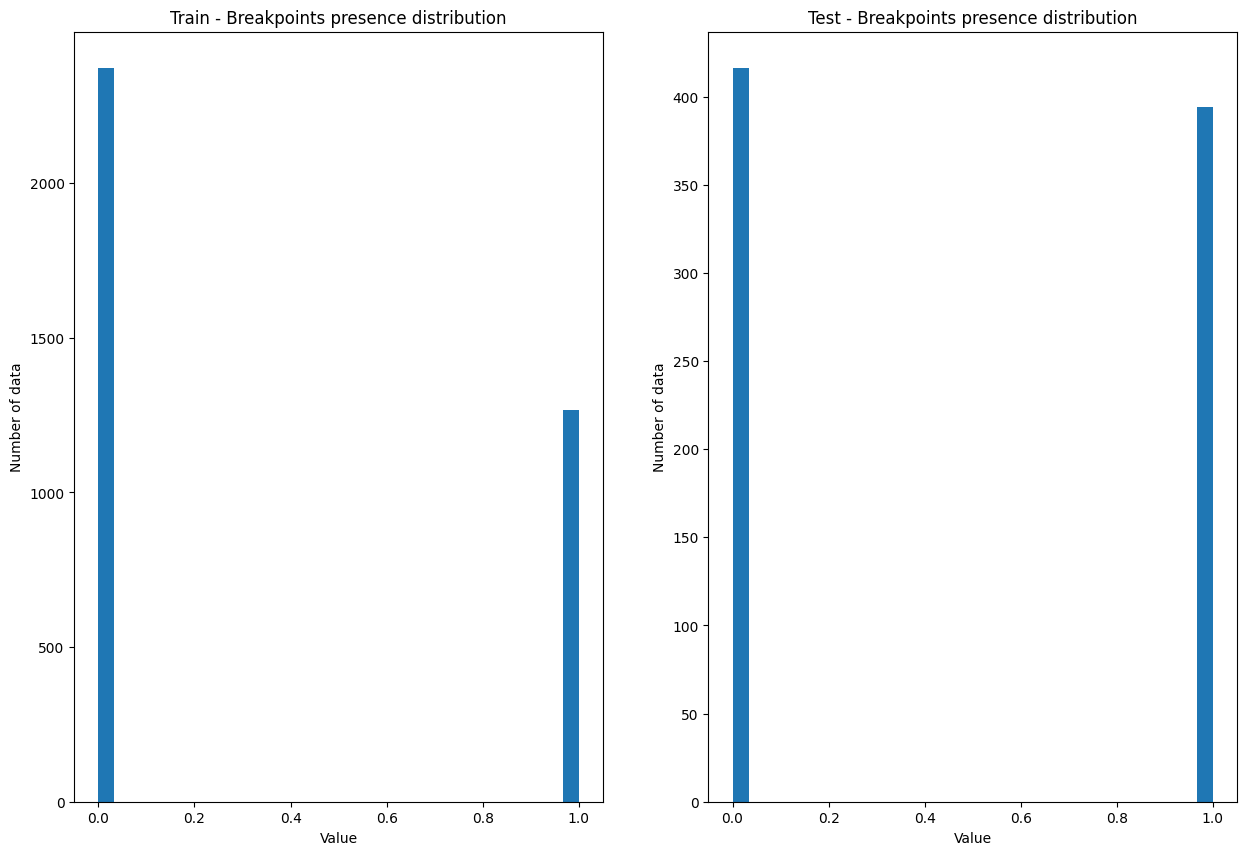

In [99]:
train_breaks_number = [int(len(data.bkps)>1) for data in train_database.datas]
test_breaks_number = [int(len(data.bkps)>1) for data in test_database.datas]

cols = math.ceil(math.sqrt(2))  # Try to make the figure roughly square
rows = math.ceil(2 / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

axes[0].hist(train_breaks_number, bins = 30)
axes[0].set_title(f'Train - Breakpoints presence distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Number of data')

axes[1].hist(test_breaks_number, bins = 30)
axes[1].set_title(f'Test - Breakpoints presence distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Number of data')

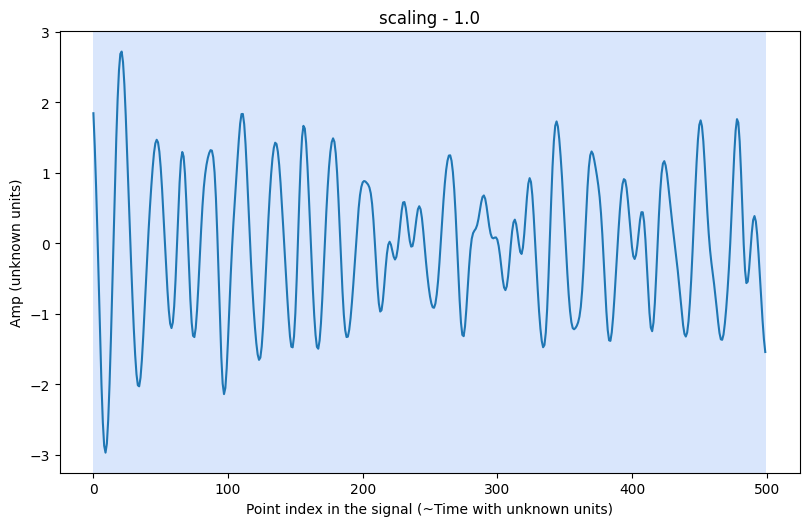

<Figure size 640x480 with 0 Axes>

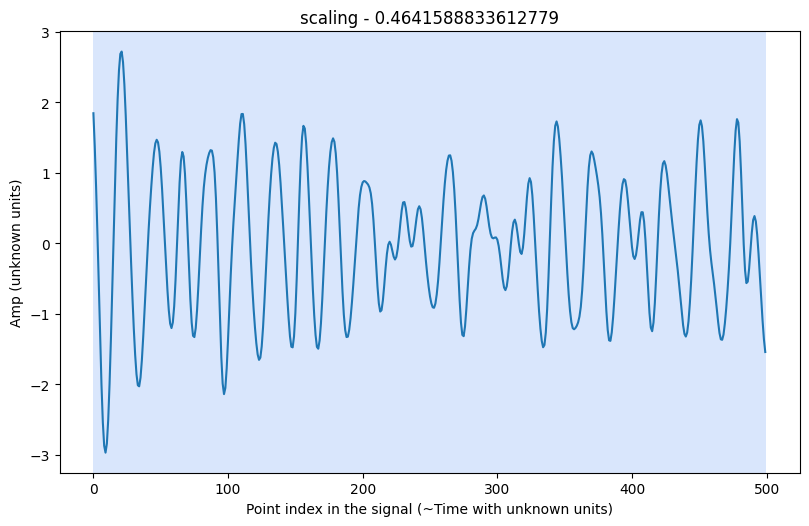

<Figure size 640x480 with 0 Axes>

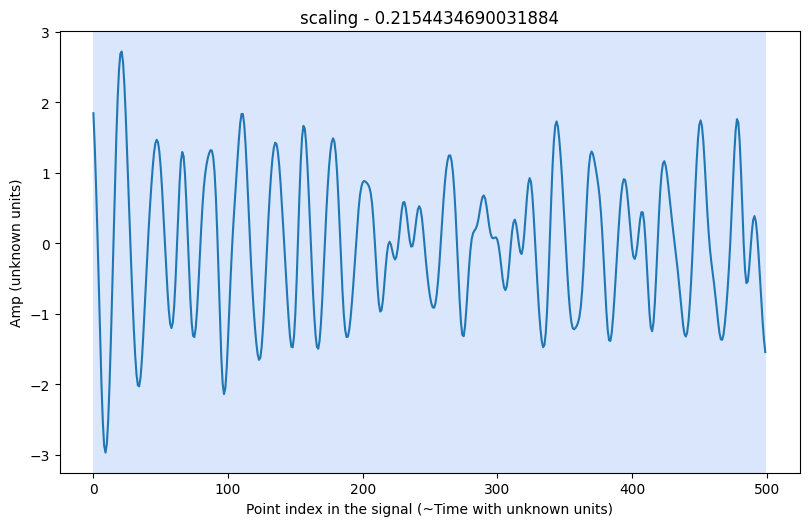

<Figure size 640x480 with 0 Axes>

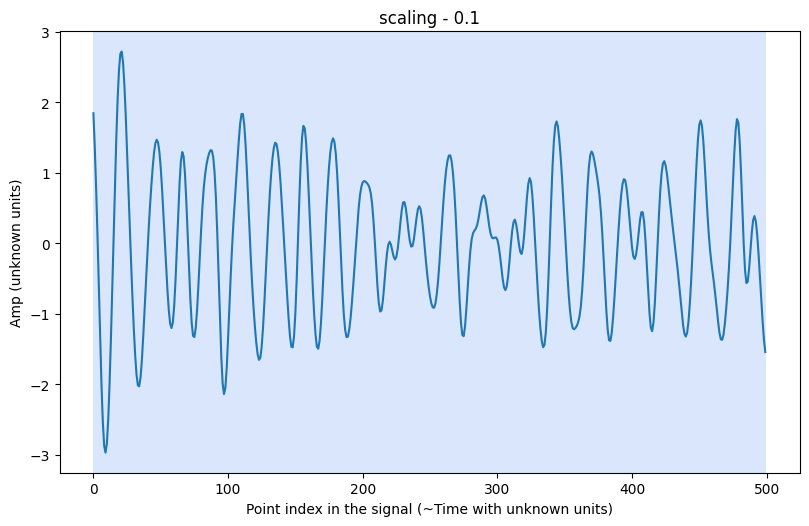

<Figure size 640x480 with 0 Axes>

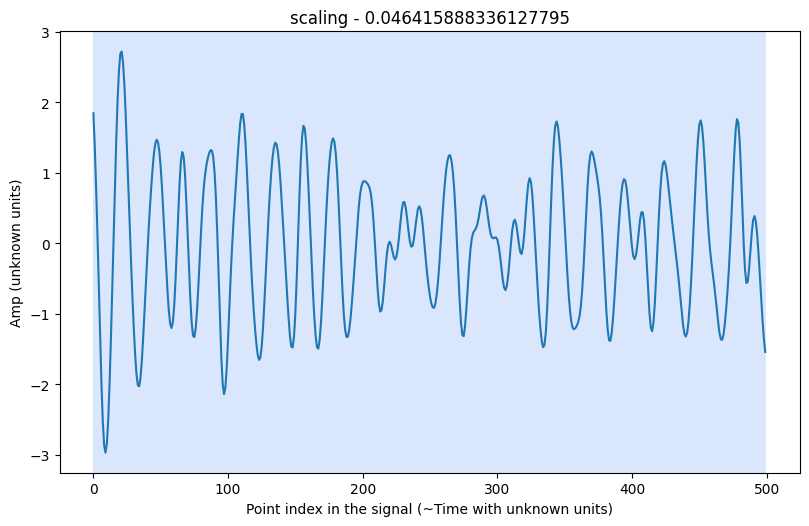

<Figure size 640x480 with 0 Axes>

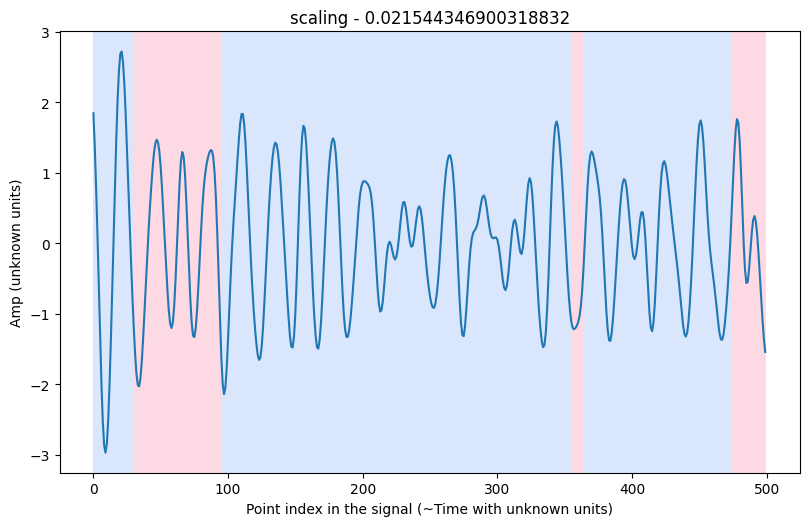

<Figure size 640x480 with 0 Axes>

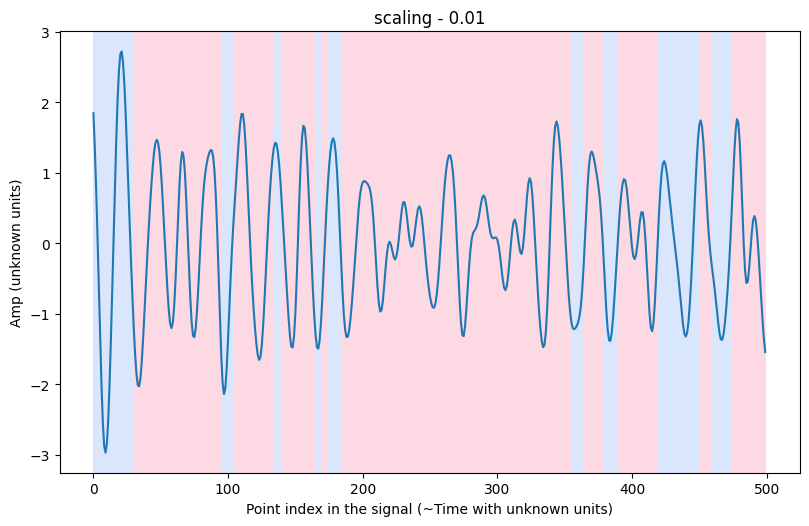

<Figure size 640x480 with 0 Axes>

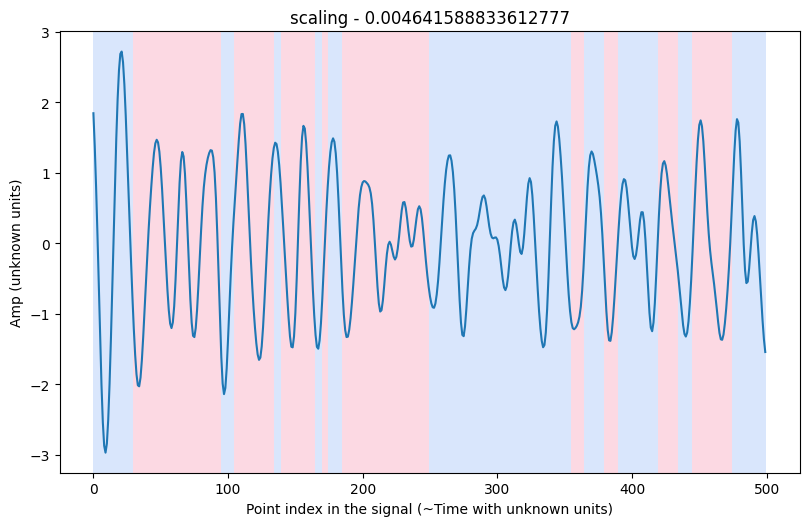

<Figure size 640x480 with 0 Axes>

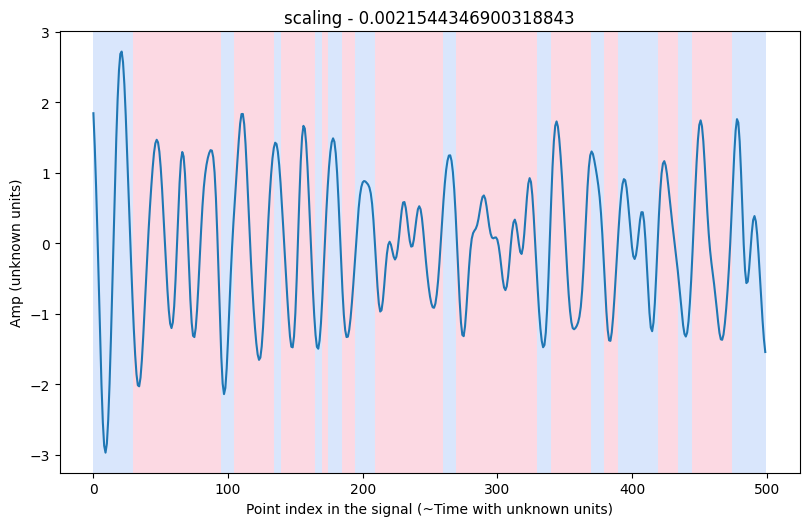

<Figure size 640x480 with 0 Axes>

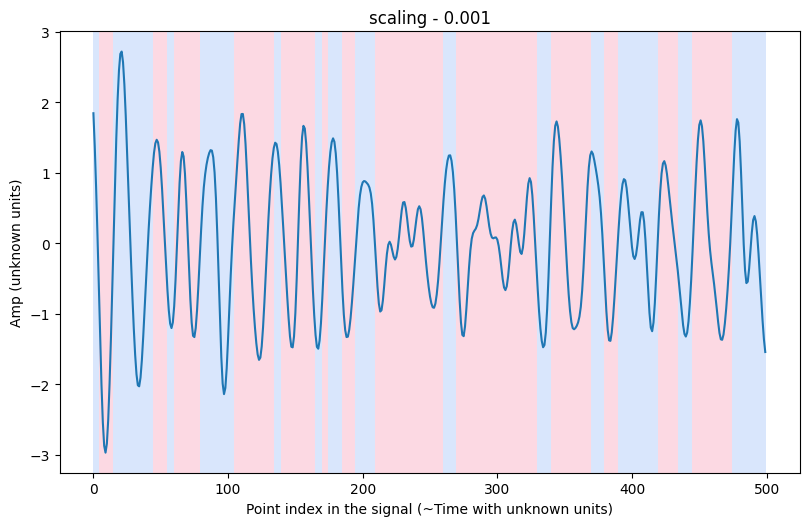

<Figure size 640x480 with 0 Axes>

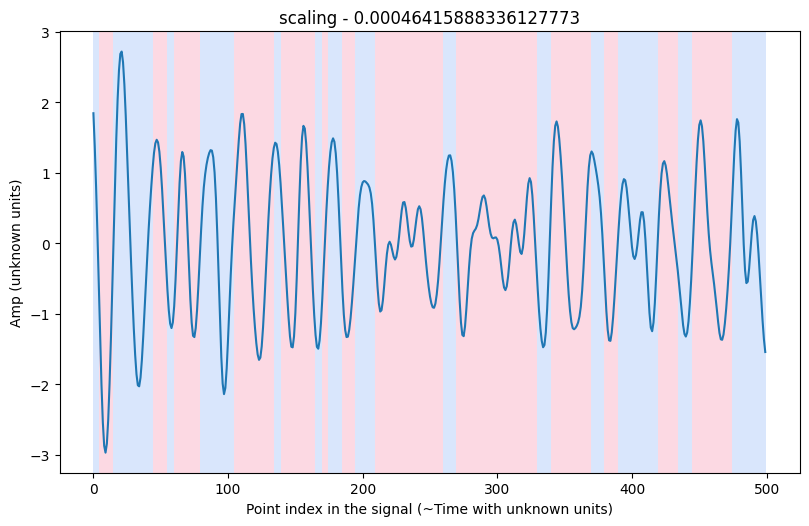

<Figure size 640x480 with 0 Axes>

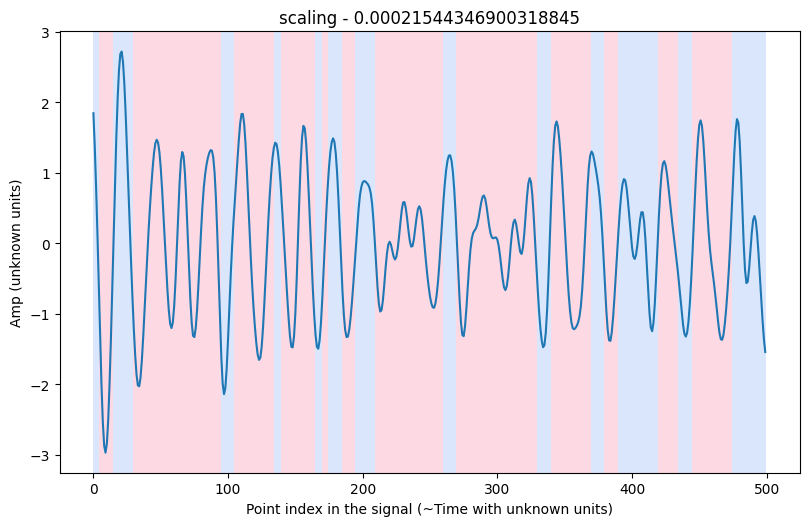

<Figure size 640x480 with 0 Axes>

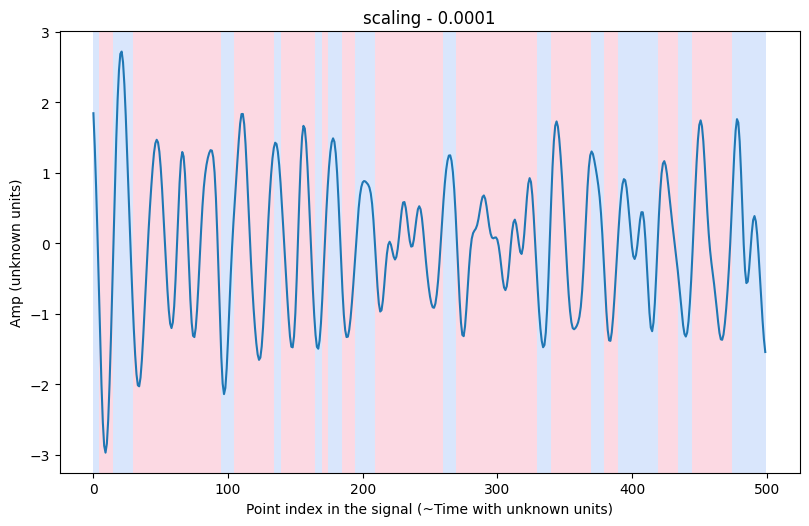

<Figure size 640x480 with 0 Axes>

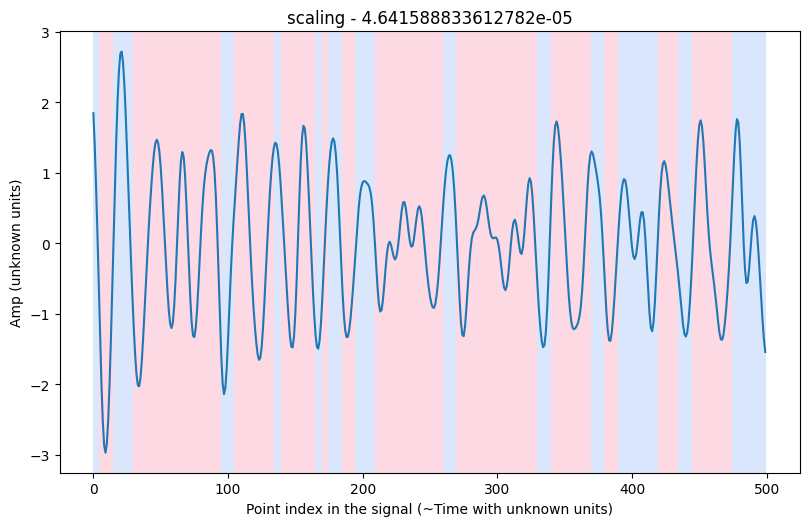

<Figure size 640x480 with 0 Axes>

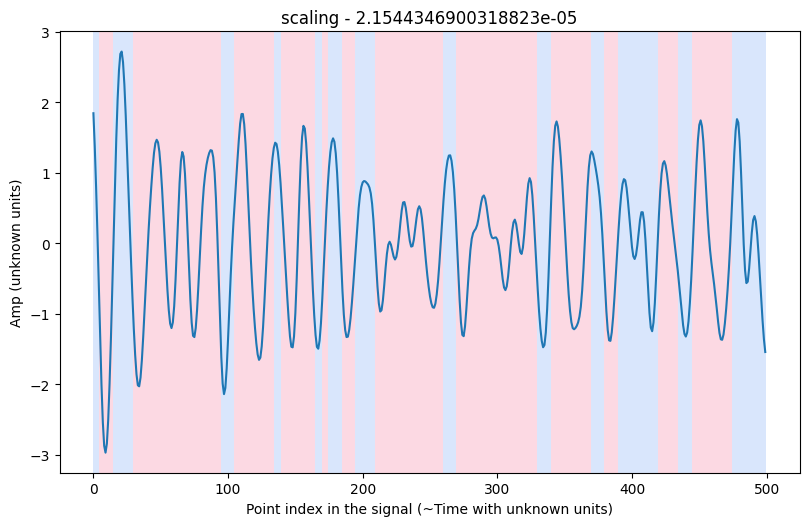

<Figure size 640x480 with 0 Axes>

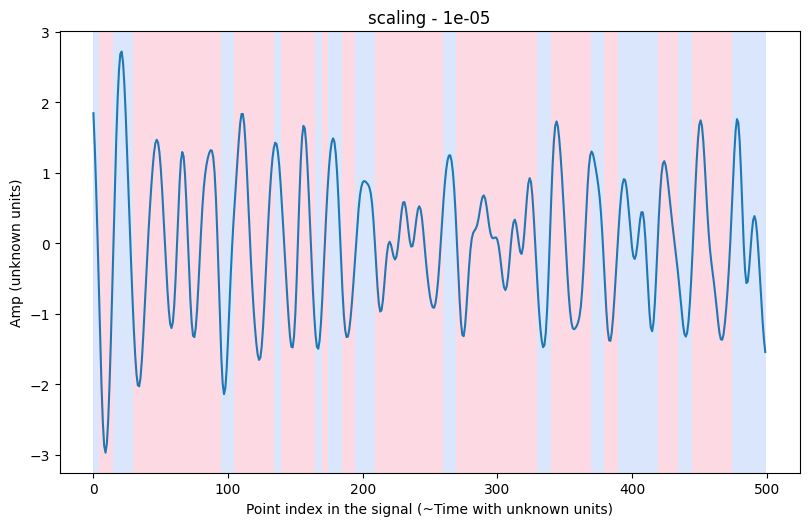

<Figure size 640x480 with 0 Axes>

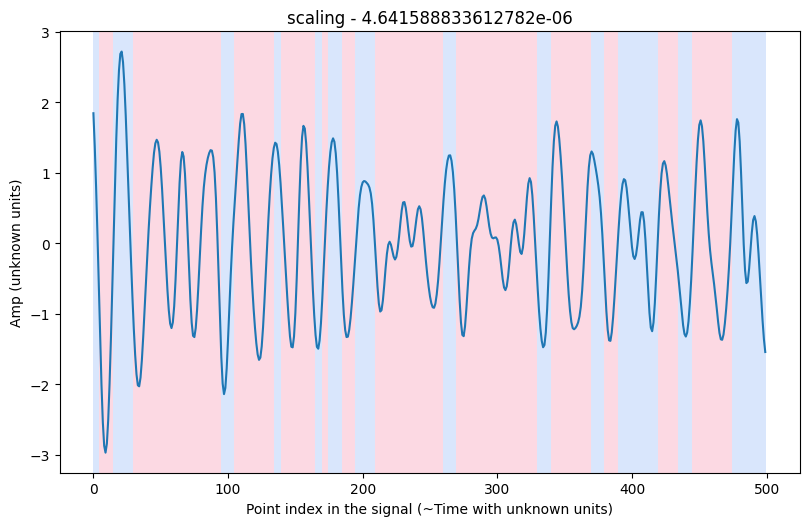

<Figure size 640x480 with 0 Axes>

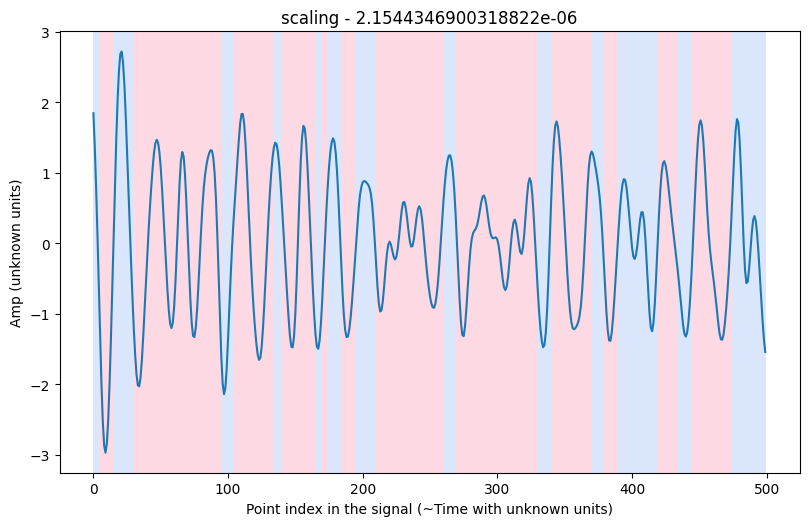

<Figure size 640x480 with 0 Axes>

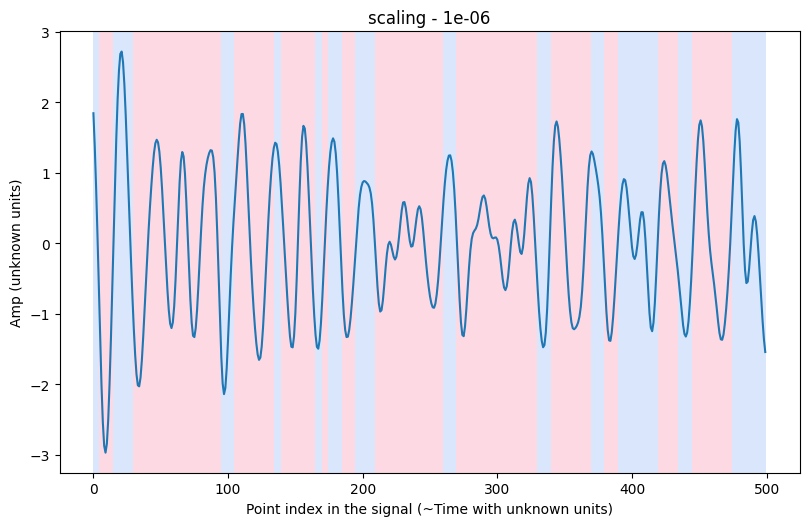

<Figure size 640x480 with 0 Axes>

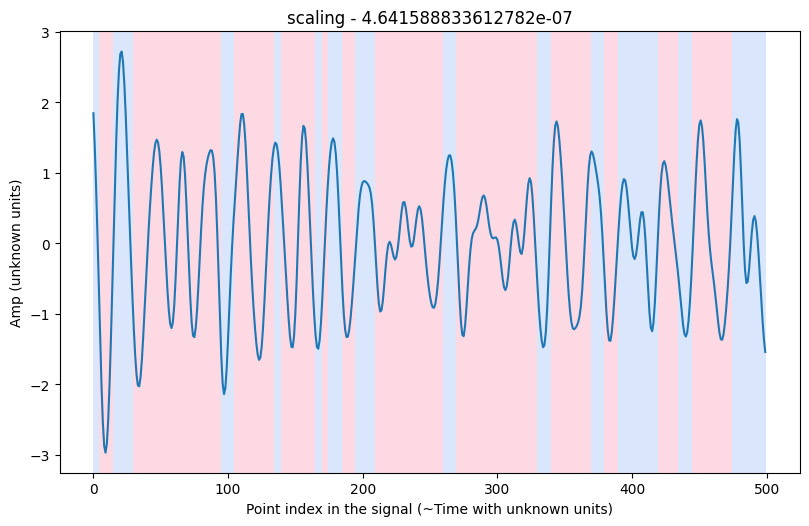

<Figure size 640x480 with 0 Axes>

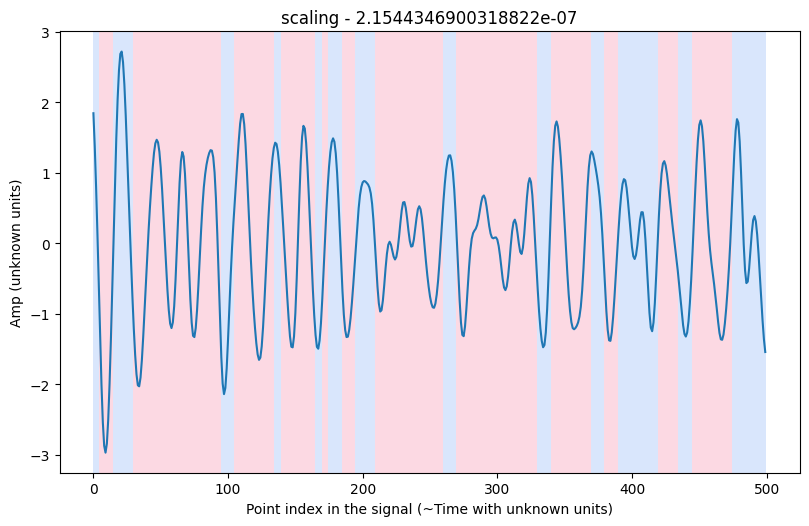

<Figure size 640x480 with 0 Axes>

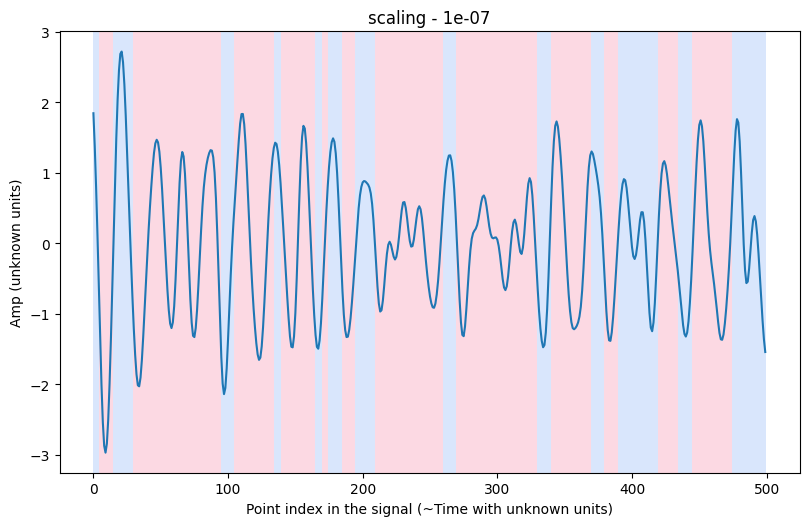

<Figure size 640x480 with 0 Axes>

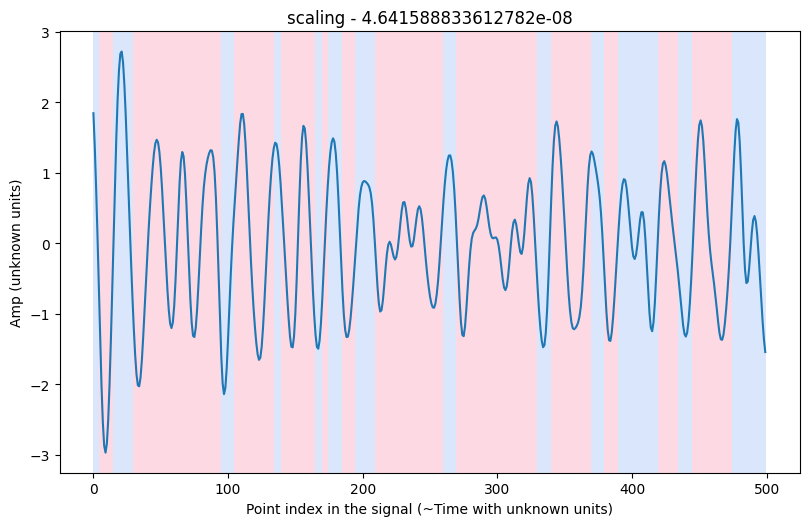

<Figure size 640x480 with 0 Axes>

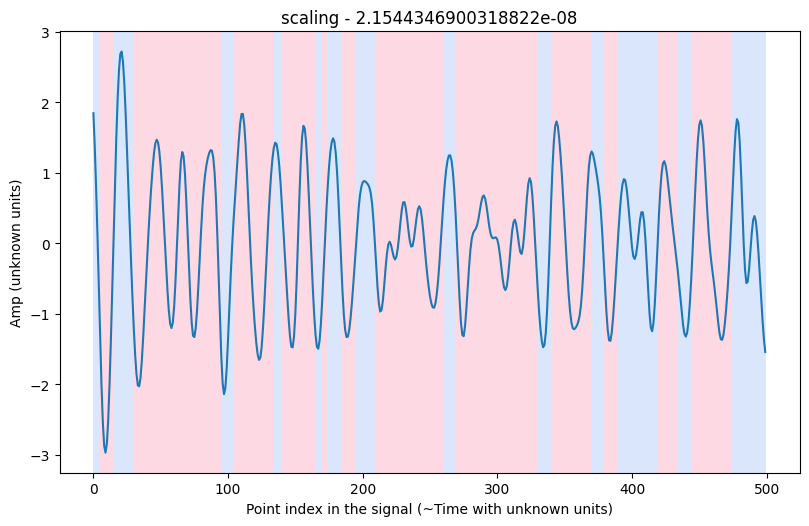

<Figure size 640x480 with 0 Axes>

In [100]:
data = train_database.datas[1856]

#scaling_coef_list = [10**(i/3) for i in range(18)]
scaling_coef_list = [10**(-i/3) for i in range(24)]
for scaling_coef in scaling_coef_list:
    bkps = segmentation_2(data.values, scaling_coef, min_size)
    plot_segmentation(data.values, bkps)
    plt.title(f'scaling - {scaling_coef}')
    plt.xlabel('Point index in the signal (~Time with unknown units)')
    plt.ylabel('Amp (unknown units)')
    plt.show()
    plt.clf()